In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

## There are two main raw datasets, which are: 
1. dataset_indo.csv: the dataset includes the list of things to do at each of the travel destinations
2. datasetindo_hotel_flight.csv: the dataset includes hotel and flight data for each of the travel destinations
3. dataset_spot_indo.csv: the dataset includes list of the spots in each of the travel destinations. 

The third dataset will be handled later on in this notebook. First, we will focus on the first two.

In [3]:
df_todo=pd.read_csv("dataset_indo.csv")
df_hotel_flight=pd.read_csv("datasetindo_hotel_flight.csv")

In [4]:
df_todo

,Unnamed: 0,Country Name,Travel Destination,Checking,Things to Do,location,reviewcount
0,0,Indonesia,Bintan,Bintan,"['Tur (39)', 'Aktivitas Luar Ruangan (30)', 'T...","Bintan Regency, Indonesia",25006
1,2,Indonesia,Seminyak,Seminyak,"['Tur (204)', 'Spa & Kebugaran (164)', 'Aktivi...","Kecamatan Kuta, Indonesia",451212
2,3,Indonesia,Bali,Bali,"['Tur (5.854)', 'Aktivitas Luar Ruangan (3.740...",Indonesia,2998882
3,4,Indonesia,Ubud,Ubud,"['Tur (884)', 'Aktivitas Luar Ruangan (525)', ...","Gianyar Regency, Indonesia",610495
4,5,Indonesia,Jakarta,Jakarta,"['Tur (168)', 'Tempat Belanja (148)', 'Spa & K...","Jawa, Indonesia",339358
...,...,...,...,...,...,...,...
321,616,Indonesia,Toyapakeh,Toyapakeh,"['Tur (5)', 'Tur dengan Perahu & Olahraga Air ...","Nusa Penida, Indonesia",742
322,619,Indonesia,Singakerta,Singakerta,"['Spa & Kebugaran (2)', 'Tur (2)', 'Kursus & S...","Ubud, Indonesia",2019
323,621,Indonesia,Guwang,Guwang,"['Wisata Alam & Taman (1)', 'Cocok untuk Pasan...","Sukawati, Indonesia",343
324,627,Indonesia,Singapadu Kaler,Singapadu Kaler,"['Tur (1)', 'Tur dengan Perahu & Olahraga Air ...","Sukawati, Indonesia",309


In [5]:
df_todo=df_todo.drop("Unnamed: 0", axis=1)

In [6]:
df_hotel_flight

,Unnamed: 0,Travel Destination,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal
0,0,Bintan,https://www.tripadvisor.co.id/Hotels-g297718-B...,Rp 1.740.182,https://www.tripadvisor.co.id/Flights-g297718-...,NaN
1,1,Seminyak,https://www.tripadvisor.co.id/Hotels-g469404-S...,Rp 2.331.874,https://www.tripadvisor.co.id/Flights-g469404-...,Rp 1.305.700
2,2,Bali,https://www.tripadvisor.co.id/Hotels-g294226-B...,Rp 656.190,https://www.tripadvisor.co.id/Flights-g294226-...,Rp 1.145.870
3,3,Ubud,https://www.tripadvisor.co.id/Hotels-g297701-U...,Rp 2.865.927,https://www.tripadvisor.co.id/Flights-g297701-...,Rp 1.145.870
4,4,Jakarta,https://www.tripadvisor.co.id/Hotels-g294229-J...,Rp 360.563,https://www.tripadvisor.co.id/Flights-g294229-...,NaN
...,...,...,...,...,...,...
317,20,Toyapakeh,https://www.tripadvisor.co.id/Hotels-g14115586...,Rp 663.636,https://www.tripadvisor.co.id/Flights-g1411558...,Rp 1.752.927
318,21,Singakerta,https://www.tripadvisor.co.id/Hotels-g15880600...,Rp 661.107,https://www.tripadvisor.co.id/Flights-g1588060...,Rp 1.752.927
319,22,Guwang,NaN,NaN,NaN,NaN
320,23,Singapadu Kaler,https://www.tripadvisor.co.id/Hotels-g20116867...,Rp 627.097,https://www.tripadvisor.co.id/Flights-g2011686...,Rp 1.197.735


In [7]:
df_hotel_flight=df_hotel_flight.drop("Unnamed: 0", axis=1)

#### after dropping the unnecessary column in both datasets, they are merged into 1 dataset

In [8]:
df=pd.merge(df_todo, df_hotel_flight, on="Travel Destination")

In [9]:
df

,Country Name,Travel Destination,Checking,Things to Do,location,reviewcount,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal
0,Indonesia,Bintan,Bintan,"['Tur (39)', 'Aktivitas Luar Ruangan (30)', 'T...","Bintan Regency, Indonesia",25006,https://www.tripadvisor.co.id/Hotels-g297718-B...,Rp 1.740.182,https://www.tripadvisor.co.id/Flights-g297718-...,NaN
1,Indonesia,Seminyak,Seminyak,"['Tur (204)', 'Spa & Kebugaran (164)', 'Aktivi...","Kecamatan Kuta, Indonesia",451212,https://www.tripadvisor.co.id/Hotels-g469404-S...,Rp 2.331.874,https://www.tripadvisor.co.id/Flights-g469404-...,Rp 1.305.700
2,Indonesia,Bali,Bali,"['Tur (5.854)', 'Aktivitas Luar Ruangan (3.740...",Indonesia,2998882,https://www.tripadvisor.co.id/Hotels-g294226-B...,Rp 656.190,https://www.tripadvisor.co.id/Flights-g294226-...,Rp 1.145.870
3,Indonesia,Ubud,Ubud,"['Tur (884)', 'Aktivitas Luar Ruangan (525)', ...","Gianyar Regency, Indonesia",610495,https://www.tripadvisor.co.id/Hotels-g297701-U...,Rp 2.865.927,https://www.tripadvisor.co.id/Flights-g297701-...,Rp 1.145.870
4,Indonesia,Jakarta,Jakarta,"['Tur (168)', 'Tempat Belanja (148)', 'Spa & K...","Jawa, Indonesia",339358,https://www.tripadvisor.co.id/Hotels-g294229-J...,Rp 360.563,https://www.tripadvisor.co.id/Flights-g294229-...,NaN
...,...,...,...,...,...,...,...,...,...,...
325,Indonesia,Toyapakeh,Toyapakeh,"['Tur (5)', 'Tur dengan Perahu & Olahraga Air ...","Nusa Penida, Indonesia",742,https://www.tripadvisor.co.id/Hotels-g14115586...,Rp 663.636,https://www.tripadvisor.co.id/Flights-g1411558...,Rp 1.752.927
326,Indonesia,Singakerta,Singakerta,"['Spa & Kebugaran (2)', 'Tur (2)', 'Kursus & S...","Ubud, Indonesia",2019,https://www.tripadvisor.co.id/Hotels-g15880600...,Rp 661.107,https://www.tripadvisor.co.id/Flights-g1588060...,Rp 1.752.927
327,Indonesia,Guwang,Guwang,"['Wisata Alam & Taman (1)', 'Cocok untuk Pasan...","Sukawati, Indonesia",343,NaN,NaN,NaN,NaN
328,Indonesia,Singapadu Kaler,Singapadu Kaler,"['Tur (1)', 'Tur dengan Perahu & Olahraga Air ...","Sukawati, Indonesia",309,https://www.tripadvisor.co.id/Hotels-g20116867...,Rp 627.097,https://www.tripadvisor.co.id/Flights-g2011686...,Rp 1.197.735


#### now, there is one dataset which includes the Travel Destination data, Things To Do in each of the Travel Destinations, and their Hotel and Flight data

dropping all duplications

In [10]:
df=df.drop_duplicates(subset="Travel Destination", keep="first")

In [11]:
df=df.reset_index().drop("index", axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country Name        320 non-null    object
 1   Travel Destination  320 non-null    object
 2   Checking            320 non-null    object
 3   Things to Do        320 non-null    object
 4   location            320 non-null    object
 5   reviewcount         320 non-null    int64 
 6   Hotel Link          311 non-null    object
 7   Hotel Best Deal     304 non-null    object
 8   Flight Link         311 non-null    object
 9   Flight Best Deal    186 non-null    object
dtypes: int64(1), object(9)
memory usage: 25.1+ KB


### Handling missing data

There are some null values in Hotel Link, Hotel Best Deal, Flight Link and Flight Best Deal. 

For link, we will recheck to the original source (Trip Advisor website) whether the problem occurred during scraping (technical problem) that the information was not retrieved properly or is the information really unavailable for those travel destinations.

In [13]:
df[df["Hotel Link"].isnull()]

,Country Name,Travel Destination,Checking,Things to Do,location,reviewcount,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal
250,Indonesia,Celuk,Celuk,"['Tempat Belanja (5)', 'Tur (3)', 'Pemandangan...","Bali, Indonesia",176,NaN,NaN,NaN,NaN
265,Indonesia,Prambanan,Prambanan,"['Pemandangan & Tengara (5)', 'Tur (4)', 'Akti...","Jawa Tengah, Indonesia",6641,NaN,NaN,NaN,NaN
272,Indonesia,Kayuputih,Kayuputih,"['Tur (2)', 'Aktivitas Luar Ruangan (2)', 'Tra...","Sukasada, Indonesia",432,NaN,NaN,NaN,NaN
282,Indonesia,Imogiri,Imogiri,"['Wisata Alam & Taman (2)', 'Tempat Belanja (1...","Yogyakarta, Indonesia",305,NaN,NaN,NaN,NaN
284,Indonesia,Rinca,Rinca,"['Tur (1)', 'Tur dengan Perahu & Olahraga Air ...","Taman Nasional Komodo, Indonesia",727,NaN,NaN,NaN,NaN
286,Indonesia,Sangeh,Sangeh,"['Pemandangan & Tengara (2)', 'Tempat Belanja ...","Bali, Indonesia",535,NaN,NaN,NaN,NaN
292,Indonesia,Manggar,Manggar,"['Pemandangan & Tengara (2)', 'Wisata Alam & T...","Pulau Belitung, Indonesia",190,NaN,NaN,NaN,NaN
305,Indonesia,Nungnung,Nungnung,"['Wisata Alam & Taman (1)', 'Cocok untuk Pasan...","Bali, Indonesia",334,NaN,NaN,NaN,NaN
317,Indonesia,Guwang,Guwang,"['Wisata Alam & Taman (1)', 'Cocok untuk Pasan...","Sukawati, Indonesia",343,NaN,NaN,NaN,NaN


since there are only 9 (nine) missing data in Hotel Link, we can do manual imputation because I think it is not efficient to rerun selenium codes only for several missing informations. We will fill out the Hotel Best Deal, Flight Link, and also Flight Best Deal for the 9 (nine) destinations altogether in the process.

In [22]:
df.at[250,"Hotel Link"]="https://www.tripadvisor.com/Hotels-g1592991-Celuk_Bali-Hotels.html"
df.at[250,"Hotel Best Deal"]="Rp 684.167"
df.at[250,"Flight Link"]="https://www.tripadvisor.com/CheapFlightsSearchResults-g297694-a_airport0.JKT-a_airport1.DPS-a_cos.0-a_date0.20201029-a_date1.20201030-a_formImp.21ff92a6__2D__e799__2D__48b9__2D__853e__2D__013fa661adbf__2E__5683-a_nearby0.no-a_nearby1.no-a_nonstop.no-a_pax0.a-a_travelers.1-Denpasar_Bali.html"
df.at[250,"Flight Best Deal"]="Rp 1.273.077"

df.at[265,"Hotel Link"]="https://www.tripadvisor.com/Hotels-g8067878-Prambanan_Central_Java_Java-Hotels.html"
df.at[265,"Hotel Best Deal"]="Rp 937.191"
df.at[265,"Flight Link"]="https://www.tripadvisor.com/CheapFlightsSearchResults-g294230-a_airport0.JKT-a_airport1.JOG-a_cos.0-a_date0.20201029-a_date1.20201030-a_nearby0.no-a_nearby1.no-a_nonstop.no-a_pax0.a-a_travelers.1-Yogyakarta_Region_Java.html"
df.at[265,"Flight Best Deal"]="Rp 1.724.800"

df.at[272,"Hotel Link"]="https://www.tripadvisor.com/Hotels-g11435643-Kayuputih_Sukasada_Buleleng_Regency_Bali-Hotels.html"
df.at[272,"Hotel Best Deal"]="Rp 1.239.669"
df.at[272,"Flight Link"]="https://www.tripadvisor.com/CheapFlightsSearchResults-g297694-a_airport0.JKT-a_airport1.DPS-a_cos.0-a_date0.20201029-a_date1.20201030-a_formImp.21ff92a6__2D__e799__2D__48b9__2D__853e__2D__013fa661adbf__2E__5683-a_nearby0.no-a_nearby1.no-a_nonstop.no-a_pax0.a-a_travelers.1-Denpasar_Bali.html"
df.at[272,"Flight Best Deal"]="Rp 1.273.077"

df.at[282,"Hotel Link"]="https://www.tripadvisor.com/Hotels-g3333916-Imogiri_Yogyakarta_Region_Java-Hotels.html"
df.at[282,"Hotel Best Deal"]="Rp 172.702"
df.at[282,"Flight Link"]="https://www.tripadvisor.com/CheapFlightsSearchResults-g294230-a_airport0.JKT-a_airport1.JOG-a_cos.0-a_date0.20201029-a_date1.20201030-a_nearby0.no-a_nearby1.no-a_nonstop.no-a_pax0.a-a_travelers.1-Yogyakarta_Region_Java.html"
df.at[282,"Flight Best Deal"]="Rp 1.724.800"

df.at[286,"Hotel Link"]="https://www.tripadvisor.com/Hotels-g9723252-Sangeh_Bali-Hotels.html"
df.at[286,"Hotel Best Deal"]="Rp 750.000"
df.at[286,"Flight Link"]="https://www.tripadvisor.com/CheapFlightsSearchResults-g297694-a_airport0.JKT-a_airport1.DPS-a_cos.0-a_date0.20201029-a_date1.20201030-a_formImp.21ff92a6__2D__e799__2D__48b9__2D__853e__2D__013fa661adbf__2E__5683-a_nearby0.no-a_nearby1.no-a_nonstop.no-a_pax0.a-a_travelers.1-Denpasar_Bali.html"
df.at[286,"Flight Best Deal"]="Rp 1.724.800"

df.at[284,"Hotel Link"]="https://www.tripadvisor.com/Hotels-g1820452-Rinca_Komodo_National_Park_Komodo_East_Nusa_Tenggara-Hotels.html"
df.at[284,"Hotel Best Deal"]="Rp 624.732"
df.at[284,"Flight Link"]="https://www.tripadvisor.com/CheapFlightsSearchResults-g297728-a_airport0.JKT-a_airport1.TMC-a_cos.0-a_date0.20201029-a_date1.20201030-a_nearby0.no-a_nearby1.no-a_nonstop.no-a_pax0.a-a_travelers.1-East_Nusa_Tenggara.html"
df.at[284,"Flight Best Deal"]="Rp 3.763.200"

df.at[292,"Hotel Link"]="https://www.tripadvisor.com/Hotels-g3396933-Manggar_Belitung_Island_Bangka_Belitung_Islands_Sumatra-Hotels.html"
df.at[292,"Hotel Best Deal"]="Rp 134.883"
df.at[292,"Flight Link"]="https://www.tripadvisor.com/CheapFlightsSearchResults-g668845-a_airport0.JKT-a_airport1.TJQ-a_cos.0-a_date0.20201029-a_date1.20201030-a_formImp.88f2e0f0__2D__54ca__2D__4250__2D__b37a__2D__27975e20eb67__2E__7499-a_nearby0.no-a_nearby1.no-a_nonstop.no-a_pax0.a-a_travelers.1-Belitung_Island_Bangka_Belitung_Islands_Sumatra.html"
df.at[292,"Flight Best Deal"]="Rp 739.470"

df.at[305,"Hotel Link"]="https://www.tripadvisor.com/Hotels-g9856222-Nungnung_Bali-Hotels.html"
df.at[305,"Hotel Best Deal"]="Rp 629.256"
df.at[305,"Flight Link"]="https://www.tripadvisor.com/CheapFlightsSearchResults-g297694-a_airport0.JKT-a_airport1.DPS-a_cos.0-a_date0.20201029-a_date1.20201030-a_formImp.21ff92a6__2D__e799__2D__48b9__2D__853e__2D__013fa661adbf__2E__5683-a_nearby0.no-a_nearby1.no-a_nonstop.no-a_pax0.a-a_travelers.1-Denpasar_Bali.html"
df.at[305,"Flight Best Deal"]="Rp 1.724.800"

df.at[317,"Hotel Link"]="https://www.tripadvisor.com/Hotels-g19140131-Guwang_Sukawati_Gianyar_Regency_Bali-Hotels.html"
df.at[317,"Hotel Best Deal"]="Rp 235.636"
df.at[317,"Flight Link"]="https://www.tripadvisor.com/CheapFlightsSearchResults-g297694-a_airport0.JKT-a_airport1.DPS-a_cos.0-a_date0.20201029-a_date1.20201030-a_formImp.21ff92a6__2D__e799__2D__48b9__2D__853e__2D__013fa661adbf__2E__5683-a_nearby0.no-a_nearby1.no-a_nonstop.no-a_pax0.a-a_travelers.1-Denpasar_Bali.html"
df.at[317,"Flight Best Deal"]="Rp 1.724.800"


checking if there is any null values remain

In [23]:
df[df["Hotel Link"].isnull()]

,Country Name,Travel Destination,Checking,Things to Do,location,reviewcount,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country Name        320 non-null    object
 1   Travel Destination  320 non-null    object
 2   Checking            320 non-null    object
 3   Things to Do        320 non-null    object
 4   location            320 non-null    object
 5   reviewcount         320 non-null    int64 
 6   Hotel Link          320 non-null    object
 7   Hotel Best Deal     313 non-null    object
 8   Flight Link         320 non-null    object
 9   Flight Best Deal    195 non-null    object
dtypes: int64(1), object(9)
memory usage: 25.1+ KB


### Formatting Hotel and Flight Best Deal

We will first reformat the Hotel Best Deal and Flight Best Deal into integer, but we will need to first fill the NaN values

In [25]:
df["Hotel Best Deal"]=df["Hotel Best Deal"].str[3:]

In [26]:
df["Hotel Best Deal"]=df["Hotel Best Deal"].str.replace(".","")

C:\Users\91965\AppData\Local\Temp\ipykernel_684\3934911851.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Hotel Best Deal"]=df["Hotel Best Deal"].str.replace(".","")


In [27]:
df=df.drop("Checking", axis=1)

In [28]:
df

,Country Name,Travel Destination,Things to Do,location,reviewcount,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal
0,Indonesia,Bintan,"['Tur (39)', 'Aktivitas Luar Ruangan (30)', 'T...","Bintan Regency, Indonesia",25006,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,NaN
1,Indonesia,Seminyak,"['Tur (204)', 'Spa & Kebugaran (164)', 'Aktivi...","Kecamatan Kuta, Indonesia",451212,https://www.tripadvisor.co.id/Hotels-g469404-S...,2331874,https://www.tripadvisor.co.id/Flights-g469404-...,Rp 1.305.700
2,Indonesia,Bali,"['Tur (5.854)', 'Aktivitas Luar Ruangan (3.740...",Indonesia,2998882,https://www.tripadvisor.co.id/Hotels-g294226-B...,656190,https://www.tripadvisor.co.id/Flights-g294226-...,Rp 1.145.870
3,Indonesia,Ubud,"['Tur (884)', 'Aktivitas Luar Ruangan (525)', ...","Gianyar Regency, Indonesia",610495,https://www.tripadvisor.co.id/Hotels-g297701-U...,2865927,https://www.tripadvisor.co.id/Flights-g297701-...,Rp 1.145.870
4,Indonesia,Jakarta,"['Tur (168)', 'Tempat Belanja (148)', 'Spa & K...","Jawa, Indonesia",339358,https://www.tripadvisor.co.id/Hotels-g294229-J...,360563,https://www.tripadvisor.co.id/Flights-g294229-...,NaN
...,...,...,...,...,...,...,...,...,...
315,Indonesia,Toyapakeh,"['Tur (5)', 'Tur dengan Perahu & Olahraga Air ...","Nusa Penida, Indonesia",742,https://www.tripadvisor.co.id/Hotels-g14115586...,663636,https://www.tripadvisor.co.id/Flights-g1411558...,Rp 1.752.927
316,Indonesia,Singakerta,"['Spa & Kebugaran (2)', 'Tur (2)', 'Kursus & S...","Ubud, Indonesia",2019,https://www.tripadvisor.co.id/Hotels-g15880600...,661107,https://www.tripadvisor.co.id/Flights-g1588060...,Rp 1.752.927
317,Indonesia,Guwang,"['Wisata Alam & Taman (1)', 'Cocok untuk Pasan...","Sukawati, Indonesia",343,https://www.tripadvisor.com/Hotels-g19140131-G...,235636,https://www.tripadvisor.com/CheapFlightsSearch...,Rp 1.724.800
318,Indonesia,Singapadu Kaler,"['Tur (1)', 'Tur dengan Perahu & Olahraga Air ...","Sukawati, Indonesia",309,https://www.tripadvisor.co.id/Hotels-g20116867...,627097,https://www.tripadvisor.co.id/Flights-g2011686...,Rp 1.197.735


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country Name        320 non-null    object
 1   Travel Destination  320 non-null    object
 2   Things to Do        320 non-null    object
 3   location            320 non-null    object
 4   reviewcount         320 non-null    int64 
 5   Hotel Link          320 non-null    object
 6   Hotel Best Deal     313 non-null    object
 7   Flight Link         320 non-null    object
 8   Flight Best Deal    195 non-null    object
dtypes: int64(1), object(8)
memory usage: 22.6+ KB


We can now move into the next column with missing data, "Hotel Best Deal"

In [30]:
df[df["Hotel Best Deal"].isnull()]

,Country Name,Travel Destination,Things to Do,location,reviewcount,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal
142,Indonesia,Kepulauan Anambas,"['Wisata Alam & Taman (4)', 'Harga terjangkau ...","Riau, Indonesia",221,https://www.tripadvisor.co.id/Hotels-g3400865-...,NaN,https://www.tripadvisor.co.id/Flights-g3400865...,NaN
151,Indonesia,Bandar Neira,"['Pemandangan & Tengara (5)', 'Tur (2)', 'Tur ...","Kepulauan Maluku, Indonesia",721,https://www.tripadvisor.co.id/Hotels-g2444699-...,NaN,https://www.tripadvisor.co.id/Flights-g2444699...,NaN
158,Indonesia,Alor,"['Aktivitas Luar Ruangan (7)', 'Tur (6)', 'Tur...","Nusa Tenggara Timur, Indonesia",684,https://www.tripadvisor.co.id/Hotels-g1600794-...,NaN,https://www.tripadvisor.co.id/Flights-g1600794...,Rp 6.306.742
180,Indonesia,Payakumbuh,"['Pemandangan & Tengara (4)', 'Wisata Alam & T...","West Sumatra, Indonesia",498,https://www.tripadvisor.co.id/Hotels-g3398689-...,NaN,https://www.tripadvisor.co.id/Flights-g3398689...,Rp 1.581.040
193,Indonesia,Pulau Seram,"['Wisata Alam & Taman (6)', 'Aktivitas Luar Ru...","Kepulauan Maluku, Indonesia",134,https://www.tripadvisor.co.id/Hotels-g1600180-...,NaN,https://www.tripadvisor.co.id/Flights-g1600180...,NaN
232,Indonesia,Bayah,"['Aktivitas Luar Ruangan (2)', 'Wisata Alam & ...","Banten Province, Indonesia",207,https://www.tripadvisor.co.id/Hotels-g3381380-...,NaN,https://www.tripadvisor.co.id/Flights-g3381380...,NaN
289,Indonesia,Kalabahi,"['Aktivitas Luar Ruangan (3)', 'Tur (2)', 'Tur...","Alor, Indonesia",189,https://www.tripadvisor.co.id/Hotels-g2444661-...,NaN,https://www.tripadvisor.co.id/Flights-g2444661...,Rp 6.044.192


For the same reason as Hotel Link, I did manual imputation to Hotel Best Deal for there are only 7 (seven) missing values, and will fill out the Flight Best Deal data for them altogether

In [31]:
df["Flight Best Deal"][142]=1368300
df["Hotel Best Deal"][142]=785375

df["Hotel Best Deal"][151]=270000
df["Flight Best Deal"][151]=3616700

df["Hotel Best Deal"][158]=469495

df["Hotel Best Deal"][180]=259497

df["Hotel Best Deal"][193]=361466
df["Flight Best Deal"][193]=3616700

df["Hotel Best Deal"][232]=469697
df["Flight Best Deal"][232]=0

df["Hotel Best Deal"][289]=469495

C:\Users\91965\AppData\Local\Temp\ipykernel_684\325960837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Flight Best Deal"][142]=1368300
C:\Users\91965\AppData\Local\Temp\ipykernel_684\325960837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hotel Best Deal"][142]=785375
C:\Users\91965\AppData\Local\Temp\ipykernel_684\325960837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hotel Best Deal"][151]=270000
C:\Us

In [32]:
df["Hotel Best Deal"]=df["Hotel Best Deal"].astype("int")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country Name        320 non-null    object
 1   Travel Destination  320 non-null    object
 2   Things to Do        320 non-null    object
 3   location            320 non-null    object
 4   reviewcount         320 non-null    int64 
 5   Hotel Link          320 non-null    object
 6   Hotel Best Deal     320 non-null    int32 
 7   Flight Link         320 non-null    object
 8   Flight Best Deal    199 non-null    object
dtypes: int32(1), int64(1), object(7)
memory usage: 21.4+ KB


There is no more missing data except in the Flight Best Deal, which we will handle now.

In [34]:
df["Flight Best Deal"]=df["Flight Best Deal"].str[3:]

In [35]:
df["Flight Best Deal"]=df["Flight Best Deal"].str.replace(".","")

C:\Users\91965\AppData\Local\Temp\ipykernel_684\1848416150.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Flight Best Deal"]=df["Flight Best Deal"].str.replace(".","")


In [36]:
df

,Country Name,Travel Destination,Things to Do,location,reviewcount,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal
0,Indonesia,Bintan,"['Tur (39)', 'Aktivitas Luar Ruangan (30)', 'T...","Bintan Regency, Indonesia",25006,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,NaN
1,Indonesia,Seminyak,"['Tur (204)', 'Spa & Kebugaran (164)', 'Aktivi...","Kecamatan Kuta, Indonesia",451212,https://www.tripadvisor.co.id/Hotels-g469404-S...,2331874,https://www.tripadvisor.co.id/Flights-g469404-...,1305700
2,Indonesia,Bali,"['Tur (5.854)', 'Aktivitas Luar Ruangan (3.740...",Indonesia,2998882,https://www.tripadvisor.co.id/Hotels-g294226-B...,656190,https://www.tripadvisor.co.id/Flights-g294226-...,1145870
3,Indonesia,Ubud,"['Tur (884)', 'Aktivitas Luar Ruangan (525)', ...","Gianyar Regency, Indonesia",610495,https://www.tripadvisor.co.id/Hotels-g297701-U...,2865927,https://www.tripadvisor.co.id/Flights-g297701-...,1145870
4,Indonesia,Jakarta,"['Tur (168)', 'Tempat Belanja (148)', 'Spa & K...","Jawa, Indonesia",339358,https://www.tripadvisor.co.id/Hotels-g294229-J...,360563,https://www.tripadvisor.co.id/Flights-g294229-...,NaN
...,...,...,...,...,...,...,...,...,...
315,Indonesia,Toyapakeh,"['Tur (5)', 'Tur dengan Perahu & Olahraga Air ...","Nusa Penida, Indonesia",742,https://www.tripadvisor.co.id/Hotels-g14115586...,663636,https://www.tripadvisor.co.id/Flights-g1411558...,1752927
316,Indonesia,Singakerta,"['Spa & Kebugaran (2)', 'Tur (2)', 'Kursus & S...","Ubud, Indonesia",2019,https://www.tripadvisor.co.id/Hotels-g15880600...,661107,https://www.tripadvisor.co.id/Flights-g1588060...,1752927
317,Indonesia,Guwang,"['Wisata Alam & Taman (1)', 'Cocok untuk Pasan...","Sukawati, Indonesia",343,https://www.tripadvisor.com/Hotels-g19140131-G...,235636,https://www.tripadvisor.com/CheapFlightsSearch...,1724800
318,Indonesia,Singapadu Kaler,"['Tur (1)', 'Tur dengan Perahu & Olahraga Air ...","Sukawati, Indonesia",309,https://www.tripadvisor.co.id/Hotels-g20116867...,627097,https://www.tripadvisor.co.id/Flights-g2011686...,1197735


we will first slice the dataframe for only the not-null flights. I will then fill out the null values using the mean of the Flight Best Deal from the available data, with first group by their location. This is why I need to change them into int first so I can calculate the mean.

In [37]:
notnull_flight=df[df["Flight Best Deal"].notnull()]

In [38]:
notnull_flight["Flight Best Deal"]=notnull_flight["Flight Best Deal"].astype("int")

C:\Users\91965\AppData\Local\Temp\ipykernel_684\2924245041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notnull_flight["Flight Best Deal"]=notnull_flight["Flight Best Deal"].astype("int")


In [39]:
location_data=notnull_flight.groupby("location").mean()

C:\Users\91965\AppData\Local\Temp\ipykernel_684\351400237.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  location_data=notnull_flight.groupby("location").mean()


In [40]:
location_data

,reviewcount,Hotel Best Deal,Flight Best Deal
location,,,
"Abang, Indonesia",53876.000000,4.950000e+05,1.145870e+06
"Aceh, Indonesia",4984.000000,6.004070e+05,2.827200e+06
"Alor, Indonesia",189.000000,4.694950e+05,6.044192e+06
"Bali, Indonesia",95475.037037,1.195130e+06,1.349385e+06
"Bangli, Indonesia",16390.000000,4.000000e+05,1.305700e+06
...,...,...,...
"Tejakula, Indonesia",716.000000,9.523200e+05,1.300650e+06
"Timor Barat, Indonesia",2160.000000,8.175760e+05,3.764228e+06
"Ubud, Indonesia",4964.500000,2.399330e+06,1.349296e+06


In [41]:
null_flight=df[df["Flight Best Deal"].isnull()]

In [42]:
null_flight

,Country Name,Travel Destination,Things to Do,location,reviewcount,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal
0,Indonesia,Bintan,"['Tur (39)', 'Aktivitas Luar Ruangan (30)', 'T...","Bintan Regency, Indonesia",25006,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,NaN
4,Indonesia,Jakarta,"['Tur (168)', 'Tempat Belanja (148)', 'Spa & K...","Jawa, Indonesia",339358,https://www.tripadvisor.co.id/Hotels-g294229-J...,360563,https://www.tripadvisor.co.id/Flights-g294229-...,NaN
17,Indonesia,Bogor,"['Wisata Alam & Taman (42)', 'Aktivitas Luar R...","Jawa Barat, Indonesia",38424,https://www.tripadvisor.co.id/Hotels-g297706-B...,970043,https://www.tripadvisor.co.id/Flights-g297706-...,NaN
18,Indonesia,Puncak,"['Tur (2)', 'Pemandangan & Tengara (2)', 'Wisa...","Jawa Barat, Indonesia",8282,https://www.tripadvisor.co.id/Hotels-g844506-P...,611207,https://www.tripadvisor.co.id/Flights-g844506-...,NaN
25,Indonesia,Purwokerto,"['Wisata Alam & Taman (10)', 'Pemandangan & Te...","Jawa Tengah, Indonesia",3635,https://www.tripadvisor.co.id/Hotels-g790290-P...,428430,https://www.tripadvisor.co.id/Flights-g790290-...,NaN
...,...,...,...,...,...,...,...,...,...
296,Indonesia,Mendut,"['Tempat Belanja (2)', 'Tur (1)', 'Pemandangan...","Jawa Tengah, Indonesia",294,https://www.tripadvisor.co.id/Hotels-g3373423-...,306908,https://www.tripadvisor.co.id/Flights-g3373423...,NaN
306,Indonesia,Labuhan,"['Tur (7)', 'Aktivitas Luar Ruangan (7)', 'Tur...","Banten Province, Indonesia",195,https://www.tripadvisor.co.id/Hotels-g3320215-...,836621,https://www.tripadvisor.co.id/Flights-g3320215...,NaN
308,Indonesia,Cihideung,"['Wisata Alam & Taman (2)', 'Kebun Binatang & ...","Jawa Barat, Indonesia",171,https://www.tripadvisor.co.id/Hotels-g13219542...,119884,https://www.tripadvisor.co.id/Flights-g1321954...,NaN
311,Indonesia,Pulau Kri,"['Tur (4)', 'Tur dengan Perahu & Olahraga Air ...","Raja Ampat, Indonesia",131,https://www.tripadvisor.co.id/Hotels-g15024679...,578999,https://www.tripadvisor.co.id/Flights-g1502467...,NaN


In [43]:
for i in null_flight.index:
    if null_flight["location"][i] in location_data.index:
        df["Flight Best Deal"][i]=location_data.loc[df["location"][i]]["Flight Best Deal"]

C:\Users\91965\AppData\Local\Temp\ipykernel_684\3598367866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Flight Best Deal"][i]=location_data.loc[df["location"][i]]["Flight Best Deal"]


In [44]:
null_flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 319
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country Name        125 non-null    object
 1   Travel Destination  125 non-null    object
 2   Things to Do        125 non-null    object
 3   location            125 non-null    object
 4   reviewcount         125 non-null    int64 
 5   Hotel Link          125 non-null    object
 6   Hotel Best Deal     125 non-null    int32 
 7   Flight Link         125 non-null    object
 8   Flight Best Deal    0 non-null      object
dtypes: int32(1), int64(1), object(7)
memory usage: 13.3+ KB


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country Name        320 non-null    object
 1   Travel Destination  320 non-null    object
 2   Things to Do        320 non-null    object
 3   location            320 non-null    object
 4   reviewcount         320 non-null    int64 
 5   Hotel Link          320 non-null    object
 6   Hotel Best Deal     320 non-null    int32 
 7   Flight Link         320 non-null    object
 8   Flight Best Deal    294 non-null    object
dtypes: int32(1), int64(1), object(7)
memory usage: 21.4+ KB


In [46]:
df[df["Flight Best Deal"].isnull()]

,Country Name,Travel Destination,Things to Do,location,reviewcount,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal
0,Indonesia,Bintan,"['Tur (39)', 'Aktivitas Luar Ruangan (30)', 'T...","Bintan Regency, Indonesia",25006,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,NaN
29,Indonesia,Anyer,"['Wisata Alam & Taman (1)', 'Aktivitas Luar Ru...","Banten Province, Indonesia",2735,https://www.tripadvisor.co.id/Hotels-g3400871-...,668000,https://www.tripadvisor.co.id/Flights-g3400871...,NaN
32,Indonesia,Tangerang,"['Spa & Kebugaran (20)', 'Tempat Belanja (18)'...","Banten Province, Indonesia",27153,https://www.tripadvisor.co.id/Hotels-g1493703-...,525300,https://www.tripadvisor.co.id/Flights-g1493703...,NaN
71,Indonesia,Serpong,"['Spa & Kebugaran (7)', 'Hiburan & Permainan (...","Banten Province, Indonesia",5426,https://www.tripadvisor.co.id/Hotels-g3574346-...,435417,https://www.tripadvisor.co.id/Flights-g3574346...,NaN
101,Indonesia,Carita,"['Tur (6)', 'Aktivitas Luar Ruangan (6)', 'Tur...","Labuhan, Indonesia",188,https://www.tripadvisor.co.id/Hotels-g317104-C...,1307247,https://www.tripadvisor.co.id/Flights-g317104-...,NaN
107,Indonesia,Pulau Bangka,"['Wisata Alam & Taman (23)', 'Aktivitas Luar R...","Kepulauan Bangka Belitung, Indonesia",2811,https://www.tripadvisor.co.id/Hotels-g1234795-...,384000,https://www.tripadvisor.co.id/Flights-g1234795...,NaN
134,Indonesia,Sabang,"['Aktivitas Luar Ruangan (7)', 'Tur (6)', 'Tur...","Pulau Weh, Indonesia",2852,https://www.tripadvisor.co.id/Hotels-g2540440-...,227273,https://www.tripadvisor.co.id/Flights-g2540440...,NaN
136,Indonesia,Karawang,"['Pemandangan & Tengara (5)', 'Aktivitas Luar ...","Kabupaten Karawang, Indonesia",2556,https://www.tripadvisor.co.id/Hotels-g2048660-...,578999,https://www.tripadvisor.co.id/Flights-g2048660...,NaN
142,Indonesia,Kepulauan Anambas,"['Wisata Alam & Taman (4)', 'Harga terjangkau ...","Riau, Indonesia",221,https://www.tripadvisor.co.id/Hotels-g3400865-...,785375,https://www.tripadvisor.co.id/Flights-g3400865...,NaN
169,Indonesia,Waisai,"['Aktivitas Luar Ruangan (8)', 'Tur (6)', 'Tur...","Raja Ampat, Indonesia",329,https://www.tripadvisor.co.id/Hotels-g3632533-...,3622546,https://www.tripadvisor.co.id/Flights-g3632533...,NaN


now, we have reduced 125 of null values to only 26 null values left. Looking at the data, we can see that there are some areas which can be reached without flight from Jakarta, such as Banten, Bogor, and Karawang. Hence, the flight data for travel destination in those area are set to zero.

In [47]:
for i in df[df["Flight Best Deal"].isnull()].index:
    if ("Banten" in df["location"][i]) | ("Bogor" in df["location"][i]) | ("Karawang" in df["location"][i]):
        df["Flight Best Deal"][i]=0

C:\Users\91965\AppData\Local\Temp\ipykernel_684\211891516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Flight Best Deal"][i]=0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country Name        320 non-null    object
 1   Travel Destination  320 non-null    object
 2   Things to Do        320 non-null    object
 3   location            320 non-null    object
 4   reviewcount         320 non-null    int64 
 5   Hotel Link          320 non-null    object
 6   Hotel Best Deal     320 non-null    int32 
 7   Flight Link         320 non-null    object
 8   Flight Best Deal    304 non-null    object
dtypes: int32(1), int64(1), object(7)
memory usage: 21.4+ KB


We have further reduce the missing values into 16. We can now manually input the missing value by checking to other websites for flight price.

In [49]:
df[df["Flight Best Deal"].isnull()]

,Country Name,Travel Destination,Things to Do,location,reviewcount,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal
0,Indonesia,Bintan,"['Tur (39)', 'Aktivitas Luar Ruangan (30)', 'T...","Bintan Regency, Indonesia",25006,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,NaN
101,Indonesia,Carita,"['Tur (6)', 'Aktivitas Luar Ruangan (6)', 'Tur...","Labuhan, Indonesia",188,https://www.tripadvisor.co.id/Hotels-g317104-C...,1307247,https://www.tripadvisor.co.id/Flights-g317104-...,NaN
107,Indonesia,Pulau Bangka,"['Wisata Alam & Taman (23)', 'Aktivitas Luar R...","Kepulauan Bangka Belitung, Indonesia",2811,https://www.tripadvisor.co.id/Hotels-g1234795-...,384000,https://www.tripadvisor.co.id/Flights-g1234795...,NaN
134,Indonesia,Sabang,"['Aktivitas Luar Ruangan (7)', 'Tur (6)', 'Tur...","Pulau Weh, Indonesia",2852,https://www.tripadvisor.co.id/Hotels-g2540440-...,227273,https://www.tripadvisor.co.id/Flights-g2540440...,NaN
142,Indonesia,Kepulauan Anambas,"['Wisata Alam & Taman (4)', 'Harga terjangkau ...","Riau, Indonesia",221,https://www.tripadvisor.co.id/Hotels-g3400865-...,785375,https://www.tripadvisor.co.id/Flights-g3400865...,NaN
169,Indonesia,Waisai,"['Aktivitas Luar Ruangan (8)', 'Tur (6)', 'Tur...","Raja Ampat, Indonesia",329,https://www.tripadvisor.co.id/Hotels-g3632533-...,3622546,https://www.tripadvisor.co.id/Flights-g3632533...,NaN
172,Indonesia,Pulau Lembeh,"['Wisata Alam & Taman (2)', 'Pemandangan & Ten...","Bitung, Indonesia",1484,https://www.tripadvisor.co.id/Hotels-g1071667-...,875000,https://www.tripadvisor.co.id/Flights-g1071667...,NaN
174,Indonesia,Pulau Malenge,"['Tur (2)', 'Aktivitas Luar Ruangan (2)', 'Tur...","Kepulauan Togian, Indonesia",331,https://www.tripadvisor.co.id/Hotels-g12834203...,700000,https://www.tripadvisor.co.id/Flights-g1283420...,NaN
205,Indonesia,Pulau Pef,"['Tur (1)', 'Tur dengan Perahu & Olahraga Air ...","Raja Ampat, Indonesia",142,https://www.tripadvisor.co.id/Hotels-g2690061-...,698000,https://www.tripadvisor.co.id/Flights-g2690061...,NaN
206,Indonesia,Riau Archipelago,"['Tur (108)', 'Spa & Kebugaran (105)', 'Aktivi...","Riau, Indonesia",87644,https://www.tripadvisor.co.id/Hotels-g2347741-...,1426872,https://www.tripadvisor.co.id/Flights-g2347741...,NaN


In [50]:
df["Flight Best Deal"][0]=1048200
df["Flight Best Deal"][101]=0
df["Flight Best Deal"][107]=1201700
df["Flight Best Deal"][134]=3269374
df["Flight Best Deal"][142]=1048200
df["Flight Best Deal"][169]=4339113
df["Flight Best Deal"][172]=2590400
df["Flight Best Deal"][174]=2276400
df["Flight Best Deal"][205]=4339113
df["Flight Best Deal"][206]=1048200
df["Flight Best Deal"][230]=3693700
df["Flight Best Deal"][243]=3693700
df["Flight Best Deal"][255]=2276400
df["Flight Best Deal"][257]=2276400
df["Flight Best Deal"][274]=0
df["Flight Best Deal"][311]=4339113

C:\Users\91965\AppData\Local\Temp\ipykernel_684\2250007790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Flight Best Deal"][0]=1048200
C:\Users\91965\AppData\Local\Temp\ipykernel_684\2250007790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Flight Best Deal"][101]=0
C:\Users\91965\AppData\Local\Temp\ipykernel_684\2250007790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Flight Best Deal"][107]=1201700
C:\Use

In [51]:
df["Flight Best Deal"]=df["Flight Best Deal"].astype(int)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country Name        320 non-null    object
 1   Travel Destination  320 non-null    object
 2   Things to Do        320 non-null    object
 3   location            320 non-null    object
 4   reviewcount         320 non-null    int64 
 5   Hotel Link          320 non-null    object
 6   Hotel Best Deal     320 non-null    int32 
 7   Flight Link         320 non-null    object
 8   Flight Best Deal    320 non-null    int32 
dtypes: int32(2), int64(1), object(6)
memory usage: 20.1+ KB


We have finally finished handling the missing values!

### Feature Engineering

### Dropping data Tur, Transportasi, dan Sumber Info Wisatawan

Now, we will go to the third dataset, dataset_spot_indo.csv.
First, we will drop some features which is not necessary to show any personalization

In [53]:
spot=pd.read_csv("dataset_spot_indo.csv")

In [54]:
spot

,destiny,todo,todo_lagi,reviewers,link
0,Bintan,Tur (39),Air Adventures Flying Club Bintan,64.0,https://www.tripadvisor.co.id/Attraction_Revie...
1,Bintan,Tur (39),Bintan Trip,36.0,https://www.tripadvisor.co.id/Attraction_Revie...
2,Bintan,Tur (39),Bintan Taxi (民丹岛出租车服务）,32.0,https://www.tripadvisor.co.id/Attraction_Revie...
3,Bintan,Tur (39),Bintan taxi adventure,4.0,https://www.tripadvisor.co.id/Attraction_Revie...
4,Bintan,Tur (39),Bintan Adventures,26.0,https://www.tripadvisor.co.id/Attraction_Revie...
...,...,...,...,...,...
27940,Guwang,Cocok untuk Pasangan (1),Beji Guwang Hidden Canyon,323.0,https://www.tripadvisor.co.id/Attraction_Revie...
27941,Guwang,Harga terjangkau (1),Beji Guwang Hidden Canyon,323.0,https://www.tripadvisor.co.id/Attraction_Revie...
27942,Guwang,Cocok untuk Penggemar Aktivitas Ekstrem (1),Beji Guwang Hidden Canyon,323.0,https://www.tripadvisor.co.id/Attraction_Revie...
27943,Guwang,Tempat yang Belum Populer (1),Beji Guwang Hidden Canyon,323.0,https://www.tripadvisor.co.id/Attraction_Revie...


In [55]:
idx_tur_transport=[]

for i in range(len(spot)):
    if ("Tur" in spot["todo"][i])|("Transportasi" in spot["todo"][i])|("Sumber" in spot["todo"][i]):
        print(i, spot["destiny"][i], spot["todo"][i])
        idx_tur_transport.append(i)

0 Bintan Tur (39)
1 Bintan Tur (39)
2 Bintan Tur (39)
3 Bintan Tur (39)
4 Bintan Tur (39)
5 Bintan Tur (39)
6 Bintan Tur (39)
7 Bintan Tur (39)
8 Bintan Tur (39)
9 Bintan Tur (39)
10 Bintan Tur (39)
11 Bintan Tur (39)
12 Bintan Tur (39)
13 Bintan Tur (39)
14 Bintan Tur (39)
15 Bintan Tur (39)
16 Bintan Tur (39)
17 Bintan Tur (39)
18 Bintan Tur (39)
19 Bintan Tur (39)
20 Bintan Tur (39)
21 Bintan Tur (39)
22 Bintan Tur (39)
23 Bintan Tur (39)
24 Bintan Tur (39)
25 Bintan Tur (39)
26 Bintan Tur (39)
27 Bintan Tur (39)
28 Bintan Tur (39)
29 Bintan Tur (39)
60 Bintan Transportasi (21)
61 Bintan Transportasi (21)
62 Bintan Transportasi (21)
63 Bintan Transportasi (21)
64 Bintan Transportasi (21)
65 Bintan Transportasi (21)
66 Bintan Transportasi (21)
67 Bintan Transportasi (21)
68 Bintan Transportasi (21)
69 Bintan Transportasi (21)
70 Bintan Transportasi (21)
71 Bintan Transportasi (21)
72 Bintan Transportasi (21)
73 Bintan Transportasi (21)
74 Bintan Transportasi (21)
75 Bintan Transporta

In [18]:
spot=spot.drop(idx_tur_transport).reset_index().drop("index", axis=1)

NameError: name 'spot' is not defined

In [57]:
spot

,destiny,todo,todo_lagi,reviewers,link
0,Bintan,Aktivitas Luar Ruangan (30),Klub Golf Ria Bintan,249.0,https://www.tripadvisor.co.id/Attraction_Revie...
1,Bintan,Aktivitas Luar Ruangan (30),Air Adventures Flying Club Bintan,64.0,https://www.tripadvisor.co.id/Attraction_Revie...
2,Bintan,Aktivitas Luar Ruangan (30),Pantai Trikora,125.0,https://www.tripadvisor.co.id/Attraction_Revie...
3,Bintan,Aktivitas Luar Ruangan (30),Bintan Taxi (民丹岛出租车服务）,32.0,https://www.tripadvisor.co.id/Attraction_Revie...
4,Bintan,Aktivitas Luar Ruangan (30),Klub Golf Bintan Lagoon Resort,148.0,https://www.tripadvisor.co.id/Attraction_Revie...
...,...,...,...,...,...
21522,Guwang,Cocok untuk Pasangan (1),Beji Guwang Hidden Canyon,323.0,https://www.tripadvisor.co.id/Attraction_Revie...
21523,Guwang,Harga terjangkau (1),Beji Guwang Hidden Canyon,323.0,https://www.tripadvisor.co.id/Attraction_Revie...
21524,Guwang,Cocok untuk Penggemar Aktivitas Ekstrem (1),Beji Guwang Hidden Canyon,323.0,https://www.tripadvisor.co.id/Attraction_Revie...
21525,Guwang,Tempat yang Belum Populer (1),Beji Guwang Hidden Canyon,323.0,https://www.tripadvisor.co.id/Attraction_Revie...


Here, we will aggregate two columns into one, the purpose will be clear soon through this notebookk

In [15]:
spot["Spot/Vendor"]=spot["todo_lagi"]+ " - "+spot["destiny"]

NameError: name 'spot' is not defined

In [59]:
spot

,destiny,todo,todo_lagi,reviewers,link,Spot/Vendor
0,Bintan,Aktivitas Luar Ruangan (30),Klub Golf Ria Bintan,249.0,https://www.tripadvisor.co.id/Attraction_Revie...,Klub Golf Ria Bintan - Bintan
1,Bintan,Aktivitas Luar Ruangan (30),Air Adventures Flying Club Bintan,64.0,https://www.tripadvisor.co.id/Attraction_Revie...,Air Adventures Flying Club Bintan - Bintan
2,Bintan,Aktivitas Luar Ruangan (30),Pantai Trikora,125.0,https://www.tripadvisor.co.id/Attraction_Revie...,Pantai Trikora - Bintan
3,Bintan,Aktivitas Luar Ruangan (30),Bintan Taxi (民丹岛出租车服务）,32.0,https://www.tripadvisor.co.id/Attraction_Revie...,Bintan Taxi (民丹岛出租车服务） - Bintan
4,Bintan,Aktivitas Luar Ruangan (30),Klub Golf Bintan Lagoon Resort,148.0,https://www.tripadvisor.co.id/Attraction_Revie...,Klub Golf Bintan Lagoon Resort - Bintan
...,...,...,...,...,...,...
21522,Guwang,Cocok untuk Pasangan (1),Beji Guwang Hidden Canyon,323.0,https://www.tripadvisor.co.id/Attraction_Revie...,Beji Guwang Hidden Canyon - Guwang
21523,Guwang,Harga terjangkau (1),Beji Guwang Hidden Canyon,323.0,https://www.tripadvisor.co.id/Attraction_Revie...,Beji Guwang Hidden Canyon - Guwang
21524,Guwang,Cocok untuk Penggemar Aktivitas Ekstrem (1),Beji Guwang Hidden Canyon,323.0,https://www.tripadvisor.co.id/Attraction_Revie...,Beji Guwang Hidden Canyon - Guwang
21525,Guwang,Tempat yang Belum Populer (1),Beji Guwang Hidden Canyon,323.0,https://www.tripadvisor.co.id/Attraction_Revie...,Beji Guwang Hidden Canyon - Guwang


grouping all the to-do for each Spot/Vendor for use as features later on.

In [14]:
count_all=[]
city=[]
spot_td=[]
td_combined=[]

for h in spot["Spot/Vendor"].unique():
    count=0
    td=[]
    for i in range(len(spot)):
        if (spot["Spot/Vendor"][i]==h):
            td.append(spot["todo"][i])
            count+=1
    td_combined.append(td)
#     print(td)
    count_all.append(count)
    spot_td.append(h)
#     print(h,count)

NameError: name 'spot' is not defined

In [63]:
print(len(count_all))
print(len(spot_td))
print(len(td_combined))

273
273
273


In [64]:
set(count_all)

{1, 2, 3, 4, 5, 6, 7, 8}

get the result into a new dataframe

In [65]:
activity=pd.DataFrame()

activity["Spot / Vendor"]=spot_td
activity["Type"]=td_combined

In [66]:
activity

,Spot / Vendor,Type
0,Klub Golf Ria Bintan - Bintan,[Aktivitas Luar Ruangan (30)]
1,Air Adventures Flying Club Bintan - Bintan,[Aktivitas Luar Ruangan (30)]
2,Pantai Trikora - Bintan,[Aktivitas Luar Ruangan (30)]
3,Bintan Taxi (民丹岛出租车服务） - Bintan,[Aktivitas Luar Ruangan (30)]
4,Klub Golf Bintan Lagoon Resort - Bintan,[Aktivitas Luar Ruangan (30)]
...,...,...
268,Tonic Body and Soul Spa - Bali,[Spa & Kebugaran (1.294)]
269,Nusa Bali Spa - Bali,[Spa & Kebugaran (1.294)]
270,Rehat Massage & Reflexology - Bali,[Spa & Kebugaran (1.294)]
271,Ubud Pilates - Bali,[Spa & Kebugaran (1.294)]


In [67]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Spot / Vendor  273 non-null    object
 1   Type           273 non-null    object
dtypes: object(2)
memory usage: 4.4+ KB


Next, we will merge the new dataframe (list of activities at each spot) with the spot information

In [68]:
spot[spot.duplicated("Spot/Vendor")]

,destiny,todo,todo_lagi,reviewers,link,Spot/Vendor
60,Bintan,Wisata Alam & Taman (9),Pulau Penyengat,22.0,https://www.tripadvisor.co.id/Attraction_Revie...,Pulau Penyengat - Bintan
64,Bintan,Wisata Alam & Taman (9),Pulau Basing,3.0,https://www.tripadvisor.co.id/Attraction_Revie...,Pulau Basing - Bintan
65,Bintan,Wisata Alam & Taman (9),Mini Zoo Kota Kijang,3.0,https://www.tripadvisor.co.id/Attraction_Revie...,Mini Zoo Kota Kijang - Bintan
66,Bintan,Hiburan malam (6),BindoTravel,1.0,https://www.tripadvisor.co.id/Attraction_Revie...,BindoTravel - Bintan
76,Bintan,Kebun Binatang & Akuarium (2),Marine Life Discovery Park,2.0,https://www.tripadvisor.co.id/Attraction_Revie...,Marine Life Discovery Park - Bintan
...,...,...,...,...,...,...
21522,Guwang,Cocok untuk Pasangan (1),Beji Guwang Hidden Canyon,323.0,https://www.tripadvisor.co.id/Attraction_Revie...,Beji Guwang Hidden Canyon - Guwang
21523,Guwang,Harga terjangkau (1),Beji Guwang Hidden Canyon,323.0,https://www.tripadvisor.co.id/Attraction_Revie...,Beji Guwang Hidden Canyon - Guwang
21524,Guwang,Cocok untuk Penggemar Aktivitas Ekstrem (1),Beji Guwang Hidden Canyon,323.0,https://www.tripadvisor.co.id/Attraction_Revie...,Beji Guwang Hidden Canyon - Guwang
21525,Guwang,Tempat yang Belum Populer (1),Beji Guwang Hidden Canyon,323.0,https://www.tripadvisor.co.id/Attraction_Revie...,Beji Guwang Hidden Canyon - Guwang


In [69]:
spot=spot.drop_duplicates("Spot/Vendor").reset_index().drop("index",axis=1)

In [70]:
spot=spot.drop("todo", axis=1)

In [71]:
spot

,destiny,todo_lagi,reviewers,link,Spot/Vendor
0,Bintan,Klub Golf Ria Bintan,249.0,https://www.tripadvisor.co.id/Attraction_Revie...,Klub Golf Ria Bintan - Bintan
1,Bintan,Air Adventures Flying Club Bintan,64.0,https://www.tripadvisor.co.id/Attraction_Revie...,Air Adventures Flying Club Bintan - Bintan
2,Bintan,Pantai Trikora,125.0,https://www.tripadvisor.co.id/Attraction_Revie...,Pantai Trikora - Bintan
3,Bintan,Bintan Taxi (民丹岛出租车服务）,32.0,https://www.tripadvisor.co.id/Attraction_Revie...,Bintan Taxi (民丹岛出租车服务） - Bintan
4,Bintan,Klub Golf Bintan Lagoon Resort,148.0,https://www.tripadvisor.co.id/Attraction_Revie...,Klub Golf Bintan Lagoon Resort - Bintan
...,...,...,...,...,...
12410,Sangeh,Taman Mumbul,10.0,https://www.tripadvisor.co.id/Attraction_Revie...,Taman Mumbul - Sangeh
12411,Sangeh,Sangeh Traditional Village - Tur Harian,4.0,https://www.tripadvisor.co.id/Attraction_Revie...,Sangeh Traditional Village - Tur Harian - Sangeh
12412,Sangeh,Pande Made Sutata,NaN,https://www.tripadvisor.co.id/Attraction_Revie...,Pande Made Sutata - Sangeh
12413,Sangeh,Sangeh Monkey Forest,404.0,https://www.tripadvisor.co.id/Attraction_Revie...,Sangeh Monkey Forest - Sangeh


In [72]:
recsys_2=pd.merge(activity,spot, left_on="Spot / Vendor", right_on="Spot/Vendor")

In [73]:
recsys_2

,Spot / Vendor,Type,destiny,todo_lagi,reviewers,link,Spot/Vendor
0,Klub Golf Ria Bintan - Bintan,[Aktivitas Luar Ruangan (30)],Bintan,Klub Golf Ria Bintan,249.0,https://www.tripadvisor.co.id/Attraction_Revie...,Klub Golf Ria Bintan - Bintan
1,Air Adventures Flying Club Bintan - Bintan,[Aktivitas Luar Ruangan (30)],Bintan,Air Adventures Flying Club Bintan,64.0,https://www.tripadvisor.co.id/Attraction_Revie...,Air Adventures Flying Club Bintan - Bintan
2,Pantai Trikora - Bintan,[Aktivitas Luar Ruangan (30)],Bintan,Pantai Trikora,125.0,https://www.tripadvisor.co.id/Attraction_Revie...,Pantai Trikora - Bintan
3,Bintan Taxi (民丹岛出租车服务） - Bintan,[Aktivitas Luar Ruangan (30)],Bintan,Bintan Taxi (民丹岛出租车服务）,32.0,https://www.tripadvisor.co.id/Attraction_Revie...,Bintan Taxi (民丹岛出租车服务） - Bintan
4,Klub Golf Bintan Lagoon Resort - Bintan,[Aktivitas Luar Ruangan (30)],Bintan,Klub Golf Bintan Lagoon Resort,148.0,https://www.tripadvisor.co.id/Attraction_Revie...,Klub Golf Bintan Lagoon Resort - Bintan
...,...,...,...,...,...,...,...
268,Tonic Body and Soul Spa - Bali,[Spa & Kebugaran (1.294)],Bali,Tonic Body and Soul Spa,127.0,https://www.tripadvisor.co.id/Attraction_Revie...,Tonic Body and Soul Spa - Bali
269,Nusa Bali Spa - Bali,[Spa & Kebugaran (1.294)],Bali,Nusa Bali Spa,776.0,https://www.tripadvisor.co.id/Attraction_Revie...,Nusa Bali Spa - Bali
270,Rehat Massage & Reflexology - Bali,[Spa & Kebugaran (1.294)],Bali,Rehat Massage & Reflexology,718.0,https://www.tripadvisor.co.id/Attraction_Revie...,Rehat Massage & Reflexology - Bali
271,Ubud Pilates - Bali,[Spa & Kebugaran (1.294)],Bali,Ubud Pilates,90.0,https://www.tripadvisor.co.id/Attraction_Revie...,Ubud Pilates - Bali


In [74]:
recsys_2=recsys_2.drop("Spot / Vendor", axis=1)

In [75]:
recsys_2=recsys_2[["Spot/Vendor","destiny","todo_lagi","Type","link","reviewers"]]

In [76]:
recsys_2=recsys_2.rename(columns={"destiny": "Travel Destination",
                        "todo_lagi":"Spot / Vendor Name",
                        "reviewers":"Review Count",
                        "link":"Link"})

In [77]:
recsys_2

,Spot/Vendor,Travel Destination,Spot / Vendor Name,Type,Link,Review Count
0,Klub Golf Ria Bintan - Bintan,Bintan,Klub Golf Ria Bintan,[Aktivitas Luar Ruangan (30)],https://www.tripadvisor.co.id/Attraction_Revie...,249.0
1,Air Adventures Flying Club Bintan - Bintan,Bintan,Air Adventures Flying Club Bintan,[Aktivitas Luar Ruangan (30)],https://www.tripadvisor.co.id/Attraction_Revie...,64.0
2,Pantai Trikora - Bintan,Bintan,Pantai Trikora,[Aktivitas Luar Ruangan (30)],https://www.tripadvisor.co.id/Attraction_Revie...,125.0
3,Bintan Taxi (民丹岛出租车服务） - Bintan,Bintan,Bintan Taxi (民丹岛出租车服务）,[Aktivitas Luar Ruangan (30)],https://www.tripadvisor.co.id/Attraction_Revie...,32.0
4,Klub Golf Bintan Lagoon Resort - Bintan,Bintan,Klub Golf Bintan Lagoon Resort,[Aktivitas Luar Ruangan (30)],https://www.tripadvisor.co.id/Attraction_Revie...,148.0
...,...,...,...,...,...,...
268,Tonic Body and Soul Spa - Bali,Bali,Tonic Body and Soul Spa,[Spa & Kebugaran (1.294)],https://www.tripadvisor.co.id/Attraction_Revie...,127.0
269,Nusa Bali Spa - Bali,Bali,Nusa Bali Spa,[Spa & Kebugaran (1.294)],https://www.tripadvisor.co.id/Attraction_Revie...,776.0
270,Rehat Massage & Reflexology - Bali,Bali,Rehat Massage & Reflexology,[Spa & Kebugaran (1.294)],https://www.tripadvisor.co.id/Attraction_Revie...,718.0
271,Ubud Pilates - Bali,Bali,Ubud Pilates,[Spa & Kebugaran (1.294)],https://www.tripadvisor.co.id/Attraction_Revie...,90.0


In [78]:
recsys_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 272
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Spot/Vendor         273 non-null    object 
 1   Travel Destination  273 non-null    object 
 2   Spot / Vendor Name  273 non-null    object 
 3   Type                273 non-null    object 
 4   Link                273 non-null    object 
 5   Review Count        273 non-null    float64
dtypes: float64(1), object(5)
memory usage: 14.9+ KB


### DF_HOTELFLIGHT_ID : DATA EXPLORATION

In [21]:
df_hotelflight_id=pd.read_csv("dataset_indo_redi.csv")

In [22]:
df_hotelflight_id

,Country Name,Travel Destination,Things to Do,location,reviewcount,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal
0,Indonesia,Bintan,"['Tur (39)', 'Aktivitas Luar Ruangan (30)', 'T...","Bintan Regency, Indonesia",25006,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200
1,Indonesia,Seminyak,"['Tur (204)', 'Spa & Kebugaran (164)', 'Aktivi...","Kecamatan Kuta, Indonesia",451212,https://www.tripadvisor.co.id/Hotels-g469404-S...,2331874,https://www.tripadvisor.co.id/Flights-g469404-...,1305700
2,Indonesia,Bali,"['Tur (5.854)', 'Aktivitas Luar Ruangan (3.740...",Indonesia,2998882,https://www.tripadvisor.co.id/Hotels-g294226-B...,656190,https://www.tripadvisor.co.id/Flights-g294226-...,1145870
3,Indonesia,Ubud,"['Tur (884)', 'Aktivitas Luar Ruangan (525)', ...","Gianyar Regency, Indonesia",610495,https://www.tripadvisor.co.id/Hotels-g297701-U...,2865927,https://www.tripadvisor.co.id/Flights-g297701-...,1145870
4,Indonesia,Jakarta,"['Tur (168)', 'Tempat Belanja (148)', 'Spa & K...","Jawa, Indonesia",339358,https://www.tripadvisor.co.id/Hotels-g294229-J...,360563,https://www.tripadvisor.co.id/Flights-g294229-...,0
...,...,...,...,...,...,...,...,...,...
315,Indonesia,Toyapakeh,"['Tur (5)', 'Tur dengan Perahu & Olahraga Air ...","Nusa Penida, Indonesia",742,https://www.tripadvisor.co.id/Hotels-g14115586...,663636,https://www.tripadvisor.co.id/Flights-g1411558...,1752927
316,Indonesia,Singakerta,"['Spa & Kebugaran (2)', 'Tur (2)', 'Kursus & S...","Ubud, Indonesia",2019,https://www.tripadvisor.co.id/Hotels-g15880600...,661107,https://www.tripadvisor.co.id/Flights-g1588060...,1752927
317,Indonesia,Guwang,"['Wisata Alam & Taman (1)', 'Cocok untuk Pasan...","Sukawati, Indonesia",343,https://www.tripadvisor.com/Hotels-g19140131-G...,235636,https://www.tripadvisor.com/CheapFlightsSearch...,1724800
318,Indonesia,Singapadu Kaler,"['Tur (1)', 'Tur dengan Perahu & Olahraga Air ...","Sukawati, Indonesia",309,https://www.tripadvisor.co.id/Hotels-g20116867...,627097,https://www.tripadvisor.co.id/Flights-g2011686...,1197735


In [81]:
df_hotelflight_id.columns

Index(['Country Name', 'Travel Destination', 'Things to Do', 'location',
       'reviewcount', 'Hotel Link', 'Hotel Best Deal', 'Flight Link',
       'Flight Best Deal'],
      dtype='object')

In [82]:
df_hotelflight_id=df_hotelflight_id[['Country Name', 'Travel Destination', 'location', 'Things to Do', 'Hotel Link', 'Hotel Best Deal', 'Flight Link',
       'Flight Best Deal',
       'reviewcount']]

In [83]:
df_hotelflight_id=df_hotelflight_id.rename(columns={"location":"Location",
                                 "reviewcount":"Review Count"})

In [84]:
df_hotelflight_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country Name        320 non-null    object
 1   Travel Destination  320 non-null    object
 2   Location            320 non-null    object
 3   Things to Do        320 non-null    object
 4   Hotel Link          320 non-null    object
 5   Hotel Best Deal     320 non-null    int64 
 6   Flight Link         320 non-null    object
 7   Flight Best Deal    320 non-null    int64 
 8   Review Count        320 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 22.6+ KB


## Pre-Processing

In [85]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
df1=pd.read_csv("dataset_recsys1_indo.csv")
df2=pd.read_csv("dataset_recsys2_indo_droptur.csv")

In [87]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country Name        320 non-null    object
 1   Travel Destination  320 non-null    object
 2   Location            320 non-null    object
 3   Things to Do        320 non-null    object
 4   Hotel Link          320 non-null    object
 5   Hotel Best Deal     320 non-null    int64 
 6   Flight Link         320 non-null    object
 7   Flight Best Deal    320 non-null    int64 
 8   Review Count        320 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 22.6+ KB


In [88]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12415 entries, 0 to 12414
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Spot/Vendor         12415 non-null  object 
 1   Travel Destination  12415 non-null  object 
 2   Spot / Vendor Name  12415 non-null  object 
 3   Type                12415 non-null  object 
 4   Link                12415 non-null  object 
 5   Review Count        12333 non-null  float64
dtypes: float64(1), object(5)
memory usage: 582.1+ KB


In [89]:
df1.head()

,Country Name,Travel Destination,Location,Things to Do,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal,Review Count
0,Indonesia,Bintan,"Bintan Regency, Indonesia","['Tur (39)', 'Aktivitas Luar Ruangan (30)', 'T...",https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
1,Indonesia,Seminyak,"Kecamatan Kuta, Indonesia","['Tur (204)', 'Spa & Kebugaran (164)', 'Aktivi...",https://www.tripadvisor.co.id/Hotels-g469404-S...,2331874,https://www.tripadvisor.co.id/Flights-g469404-...,1305700,451212
2,Indonesia,Bali,Indonesia,"['Tur (5.854)', 'Aktivitas Luar Ruangan (3.740...",https://www.tripadvisor.co.id/Hotels-g294226-B...,656190,https://www.tripadvisor.co.id/Flights-g294226-...,1145870,2998882
3,Indonesia,Ubud,"Gianyar Regency, Indonesia","['Tur (884)', 'Aktivitas Luar Ruangan (525)', ...",https://www.tripadvisor.co.id/Hotels-g297701-U...,2865927,https://www.tripadvisor.co.id/Flights-g297701-...,1145870,610495
4,Indonesia,Jakarta,"Jawa, Indonesia","['Tur (168)', 'Tempat Belanja (148)', 'Spa & K...",https://www.tripadvisor.co.id/Hotels-g294229-J...,360563,https://www.tripadvisor.co.id/Flights-g294229-...,0,339358


In [90]:
df2.head()

,Spot/Vendor,Travel Destination,Spot / Vendor Name,Type,Link,Review Count
0,Klub Golf Ria Bintan - Bintan,Bintan,Klub Golf Ria Bintan,['Aktivitas Luar Ruangan (30)'],https://www.tripadvisor.co.id/Attraction_Revie...,249.0
1,Air Adventures Flying Club Bintan - Bintan,Bintan,Air Adventures Flying Club Bintan,['Aktivitas Luar Ruangan (30)'],https://www.tripadvisor.co.id/Attraction_Revie...,64.0
2,Pantai Trikora - Bintan,Bintan,Pantai Trikora,['Aktivitas Luar Ruangan (30)'],https://www.tripadvisor.co.id/Attraction_Revie...,125.0
3,Bintan Taxi (民丹岛出租车服务） - Bintan,Bintan,Bintan Taxi (民丹岛出租车服务）,['Aktivitas Luar Ruangan (30)'],https://www.tripadvisor.co.id/Attraction_Revie...,32.0
4,Klub Golf Bintan Lagoon Resort - Bintan,Bintan,Klub Golf Bintan Lagoon Resort,['Aktivitas Luar Ruangan (30)'],https://www.tripadvisor.co.id/Attraction_Revie...,148.0


## Recsys1 : pre-processing

We need to change "Things to Do" column with appropriate format for count vectorizer later on. Therefore, we need to make the "Things to Do" data into one word for each activity.

### Replacing symbols for feature engineering suitably

In [91]:
df1["Things to Do"]=df1["Things to Do"].str.replace("[","").str.replace("]","").str.replace("'","").str.replace(" ","").str.replace("(",",(").str.replace(",Lihatsemua,",",").str.replace(",Lihatsemua","").str.replace("&","dan").str.replace("-","")

C:\Users\91965\AppData\Local\Temp\ipykernel_684\4256922114.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1["Things to Do"]=df1["Things to Do"].str.replace("[","").str.replace("]","").str.replace("'","").str.replace(" ","").str.replace("(",",(").str.replace(",Lihatsemua,",",").str.replace(",Lihatsemua","").str.replace("&","dan").str.replace("-","")


In [92]:
df1

,Country Name,Travel Destination,Location,Things to Do,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal,Review Count
0,Indonesia,Bintan,"Bintan Regency, Indonesia","Tur,(39),AktivitasLuarRuangan,(30),Transportas...",https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
1,Indonesia,Seminyak,"Kecamatan Kuta, Indonesia","Tur,(204),SpadanKebugaran,(164),AktivitasLuarR...",https://www.tripadvisor.co.id/Hotels-g469404-S...,2331874,https://www.tripadvisor.co.id/Flights-g469404-...,1305700,451212
2,Indonesia,Bali,Indonesia,"Tur,(5.854),AktivitasLuarRuangan,(3.740),Turde...",https://www.tripadvisor.co.id/Hotels-g294226-B...,656190,https://www.tripadvisor.co.id/Flights-g294226-...,1145870,2998882
3,Indonesia,Ubud,"Gianyar Regency, Indonesia","Tur,(884),AktivitasLuarRuangan,(525),SpadanKeb...",https://www.tripadvisor.co.id/Hotels-g297701-U...,2865927,https://www.tripadvisor.co.id/Flights-g297701-...,1145870,610495
4,Indonesia,Jakarta,"Jawa, Indonesia","Tur,(168),TempatBelanja,(148),SpadanKebugaran,...",https://www.tripadvisor.co.id/Hotels-g294229-J...,360563,https://www.tripadvisor.co.id/Flights-g294229-...,0,339358
...,...,...,...,...,...,...,...,...,...
315,Indonesia,Toyapakeh,"Nusa Penida, Indonesia","Tur,(5),TurdenganPerahudanOlahragaAir,(4),Akti...",https://www.tripadvisor.co.id/Hotels-g14115586...,663636,https://www.tripadvisor.co.id/Flights-g1411558...,1752927,742
316,Indonesia,Singakerta,"Ubud, Indonesia","SpadanKebugaran,(2),Tur,(2),KursusdanSanggar,(...",https://www.tripadvisor.co.id/Hotels-g15880600...,661107,https://www.tripadvisor.co.id/Flights-g1588060...,1752927,2019
317,Indonesia,Guwang,"Sukawati, Indonesia","WisataAlamdanTaman,(1),CocokuntukPasangan,(1),...",https://www.tripadvisor.com/Hotels-g19140131-G...,235636,https://www.tripadvisor.com/CheapFlightsSearch...,1724800,343
318,Indonesia,Singapadu Kaler,"Sukawati, Indonesia","Tur,(1),TurdenganPerahudanOlahragaAir,(1),Akti...",https://www.tripadvisor.co.id/Hotels-g20116867...,627097,https://www.tripadvisor.co.id/Flights-g2011686...,1197735,309


In [93]:
df1["Things to Do"]=df1["Things to Do"].str.split(",")

In [94]:
df1

,Country Name,Travel Destination,Location,Things to Do,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal,Review Count
0,Indonesia,Bintan,"Bintan Regency, Indonesia","[Tur, (39), AktivitasLuarRuangan, (30), Transp...",https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
1,Indonesia,Seminyak,"Kecamatan Kuta, Indonesia","[Tur, (204), SpadanKebugaran, (164), Aktivitas...",https://www.tripadvisor.co.id/Hotels-g469404-S...,2331874,https://www.tripadvisor.co.id/Flights-g469404-...,1305700,451212
2,Indonesia,Bali,Indonesia,"[Tur, (5.854), AktivitasLuarRuangan, (3.740), ...",https://www.tripadvisor.co.id/Hotels-g294226-B...,656190,https://www.tripadvisor.co.id/Flights-g294226-...,1145870,2998882
3,Indonesia,Ubud,"Gianyar Regency, Indonesia","[Tur, (884), AktivitasLuarRuangan, (525), Spad...",https://www.tripadvisor.co.id/Hotels-g297701-U...,2865927,https://www.tripadvisor.co.id/Flights-g297701-...,1145870,610495
4,Indonesia,Jakarta,"Jawa, Indonesia","[Tur, (168), TempatBelanja, (148), SpadanKebug...",https://www.tripadvisor.co.id/Hotels-g294229-J...,360563,https://www.tripadvisor.co.id/Flights-g294229-...,0,339358
...,...,...,...,...,...,...,...,...,...
315,Indonesia,Toyapakeh,"Nusa Penida, Indonesia","[Tur, (5), TurdenganPerahudanOlahragaAir, (4),...",https://www.tripadvisor.co.id/Hotels-g14115586...,663636,https://www.tripadvisor.co.id/Flights-g1411558...,1752927,742
316,Indonesia,Singakerta,"Ubud, Indonesia","[SpadanKebugaran, (2), Tur, (2), KursusdanSang...",https://www.tripadvisor.co.id/Hotels-g15880600...,661107,https://www.tripadvisor.co.id/Flights-g1588060...,1752927,2019
317,Indonesia,Guwang,"Sukawati, Indonesia","[WisataAlamdanTaman, (1), CocokuntukPasangan, ...",https://www.tripadvisor.com/Hotels-g19140131-G...,235636,https://www.tripadvisor.com/CheapFlightsSearch...,1724800,343
318,Indonesia,Singapadu Kaler,"Sukawati, Indonesia","[Tur, (1), TurdenganPerahudanOlahragaAir, (1),...",https://www.tripadvisor.co.id/Hotels-g20116867...,627097,https://www.tripadvisor.co.id/Flights-g2011686...,1197735,309


In [95]:
todo=[]

for j in range(len(df1)):
    inside_todo=[]
    
    for i in df1["Things to Do"][j]:
        if "(" in i:
            inside_todo.append(" ")
        else:
            inside_todo.append(i)
    todo.append(inside_todo)

In [96]:
df1["Things to Do"]=todo

In [97]:
df1

,Country Name,Travel Destination,Location,Things to Do,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal,Review Count
0,Indonesia,Bintan,"Bintan Regency, Indonesia","[Tur, , AktivitasLuarRuangan, , Transportasi...",https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
1,Indonesia,Seminyak,"Kecamatan Kuta, Indonesia","[Tur, , SpadanKebugaran, , AktivitasLuarRuan...",https://www.tripadvisor.co.id/Hotels-g469404-S...,2331874,https://www.tripadvisor.co.id/Flights-g469404-...,1305700,451212
2,Indonesia,Bali,Indonesia,"[Tur, , AktivitasLuarRuangan, , TurdenganPer...",https://www.tripadvisor.co.id/Hotels-g294226-B...,656190,https://www.tripadvisor.co.id/Flights-g294226-...,1145870,2998882
3,Indonesia,Ubud,"Gianyar Regency, Indonesia","[Tur, , AktivitasLuarRuangan, , SpadanKebuga...",https://www.tripadvisor.co.id/Hotels-g297701-U...,2865927,https://www.tripadvisor.co.id/Flights-g297701-...,1145870,610495
4,Indonesia,Jakarta,"Jawa, Indonesia","[Tur, , TempatBelanja, , SpadanKebugaran, ,...",https://www.tripadvisor.co.id/Hotels-g294229-J...,360563,https://www.tripadvisor.co.id/Flights-g294229-...,0,339358
...,...,...,...,...,...,...,...,...,...
315,Indonesia,Toyapakeh,"Nusa Penida, Indonesia","[Tur, , TurdenganPerahudanOlahragaAir, , Akt...",https://www.tripadvisor.co.id/Hotels-g14115586...,663636,https://www.tripadvisor.co.id/Flights-g1411558...,1752927,742
316,Indonesia,Singakerta,"Ubud, Indonesia","[SpadanKebugaran, , Tur, , KursusdanSanggar,...",https://www.tripadvisor.co.id/Hotels-g15880600...,661107,https://www.tripadvisor.co.id/Flights-g1588060...,1752927,2019
317,Indonesia,Guwang,"Sukawati, Indonesia","[WisataAlamdanTaman, , CocokuntukPasangan, ,...",https://www.tripadvisor.com/Hotels-g19140131-G...,235636,https://www.tripadvisor.com/CheapFlightsSearch...,1724800,343
318,Indonesia,Singapadu Kaler,"Sukawati, Indonesia","[Tur, , TurdenganPerahudanOlahragaAir, , Akt...",https://www.tripadvisor.co.id/Hotels-g20116867...,627097,https://www.tripadvisor.co.id/Flights-g2011686...,1197735,309


In [98]:
for i in range(len(df1)):
    df1["Things to Do"][i]=''.join([str(elem) for elem in df1["Things to Do"][i]])

C:\Users\91965\AppData\Local\Temp\ipykernel_684\1908830631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Things to Do"][i]=''.join([str(elem) for elem in df1["Things to Do"][i]])


In [99]:
df1

,Country Name,Travel Destination,Location,Things to Do,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal,Review Count
0,Indonesia,Bintan,"Bintan Regency, Indonesia",Tur AktivitasLuarRuangan Transportasi Turdenga...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
1,Indonesia,Seminyak,"Kecamatan Kuta, Indonesia",Tur SpadanKebugaran AktivitasLuarRuangan Tempa...,https://www.tripadvisor.co.id/Hotels-g469404-S...,2331874,https://www.tripadvisor.co.id/Flights-g469404-...,1305700,451212
2,Indonesia,Bali,Indonesia,Tur AktivitasLuarRuangan TurdenganPerahudanOla...,https://www.tripadvisor.co.id/Hotels-g294226-B...,656190,https://www.tripadvisor.co.id/Flights-g294226-...,1145870,2998882
3,Indonesia,Ubud,"Gianyar Regency, Indonesia",Tur AktivitasLuarRuangan SpadanKebugaran Trans...,https://www.tripadvisor.co.id/Hotels-g297701-U...,2865927,https://www.tripadvisor.co.id/Flights-g297701-...,1145870,610495
4,Indonesia,Jakarta,"Jawa, Indonesia",Tur TempatBelanja SpadanKebugaran AktivitasLua...,https://www.tripadvisor.co.id/Hotels-g294229-J...,360563,https://www.tripadvisor.co.id/Flights-g294229-...,0,339358
...,...,...,...,...,...,...,...,...,...
315,Indonesia,Toyapakeh,"Nusa Penida, Indonesia",Tur TurdenganPerahudanOlahragaAir AktivitasLua...,https://www.tripadvisor.co.id/Hotels-g14115586...,663636,https://www.tripadvisor.co.id/Flights-g1411558...,1752927,742
316,Indonesia,Singakerta,"Ubud, Indonesia",SpadanKebugaran Tur KursusdanSanggar Hiburanda...,https://www.tripadvisor.co.id/Hotels-g15880600...,661107,https://www.tripadvisor.co.id/Flights-g1588060...,1752927,2019
317,Indonesia,Guwang,"Sukawati, Indonesia",WisataAlamdanTaman CocokuntukPasangan Hargater...,https://www.tripadvisor.com/Hotels-g19140131-G...,235636,https://www.tripadvisor.com/CheapFlightsSearch...,1724800,343
318,Indonesia,Singapadu Kaler,"Sukawati, Indonesia",Tur TurdenganPerahudanOlahragaAir AktivitasLua...,https://www.tripadvisor.co.id/Hotels-g20116867...,627097,https://www.tripadvisor.co.id/Flights-g2011686...,1197735,309


separating features for our recommendation system

In [17]:
cv = CountVectorizer()
cv_todo_result = cv.fit_transform(df1['Things to Do'])

NameError: name 'df1' is not defined

In [102]:
cv.get_feature_names_out()

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [103]:
todrop=[
 'cilandak',
 'gambir',
 'grogolpetamburan',
 'jatinegara',
 'kebayoranbaru',
 'mampangprapatan',
 'menteng',
 'pademangan',
 'palmerah',
 'pasarminggu',
 'penjaringan',
 'sawahbesar',
 'setiabudi',
 'tanahabang',
 'tebet',
'tur',
'denganperahudanolahragaair',
'sumberinformasiwisatawan',
'transportasi']

In [104]:
df1

,Country Name,Travel Destination,Location,Things to Do,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal,Review Count
0,Indonesia,Bintan,"Bintan Regency, Indonesia",Tur AktivitasLuarRuangan Transportasi Turdenga...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
1,Indonesia,Seminyak,"Kecamatan Kuta, Indonesia",Tur SpadanKebugaran AktivitasLuarRuangan Tempa...,https://www.tripadvisor.co.id/Hotels-g469404-S...,2331874,https://www.tripadvisor.co.id/Flights-g469404-...,1305700,451212
2,Indonesia,Bali,Indonesia,Tur AktivitasLuarRuangan TurdenganPerahudanOla...,https://www.tripadvisor.co.id/Hotels-g294226-B...,656190,https://www.tripadvisor.co.id/Flights-g294226-...,1145870,2998882
3,Indonesia,Ubud,"Gianyar Regency, Indonesia",Tur AktivitasLuarRuangan SpadanKebugaran Trans...,https://www.tripadvisor.co.id/Hotels-g297701-U...,2865927,https://www.tripadvisor.co.id/Flights-g297701-...,1145870,610495
4,Indonesia,Jakarta,"Jawa, Indonesia",Tur TempatBelanja SpadanKebugaran AktivitasLua...,https://www.tripadvisor.co.id/Hotels-g294229-J...,360563,https://www.tripadvisor.co.id/Flights-g294229-...,0,339358
...,...,...,...,...,...,...,...,...,...
315,Indonesia,Toyapakeh,"Nusa Penida, Indonesia",Tur TurdenganPerahudanOlahragaAir AktivitasLua...,https://www.tripadvisor.co.id/Hotels-g14115586...,663636,https://www.tripadvisor.co.id/Flights-g1411558...,1752927,742
316,Indonesia,Singakerta,"Ubud, Indonesia",SpadanKebugaran Tur KursusdanSanggar Hiburanda...,https://www.tripadvisor.co.id/Hotels-g15880600...,661107,https://www.tripadvisor.co.id/Flights-g1588060...,1752927,2019
317,Indonesia,Guwang,"Sukawati, Indonesia",WisataAlamdanTaman CocokuntukPasangan Hargater...,https://www.tripadvisor.com/Hotels-g19140131-G...,235636,https://www.tripadvisor.com/CheapFlightsSearch...,1724800,343
318,Indonesia,Singapadu Kaler,"Sukawati, Indonesia",Tur TurdenganPerahudanOlahragaAir AktivitasLua...,https://www.tripadvisor.co.id/Hotels-g20116867...,627097,https://www.tripadvisor.co.id/Flights-g2011686...,1197735,309


In [105]:
for i in todrop:
    df1["Things to Do"]=df1["Things to Do"].str.lower().str.replace(i,"")

rechecking whether the unneccessary information has been dropped appropriately

In [106]:
cv = CountVectorizer()
cv_todo_result = cv.fit_transform(df1['Things to Do'])

cv.get_feature_names()

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [107]:
df1

,Country Name,Travel Destination,Location,Things to Do,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal,Review Count
0,Indonesia,Bintan,"Bintan Regency, Indonesia",aktivitasluarruangan pemandangandantengara ...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
1,Indonesia,Seminyak,"Kecamatan Kuta, Indonesia",spadankebugaran aktivitasluarruangan tempatbe...,https://www.tripadvisor.co.id/Hotels-g469404-S...,2331874,https://www.tripadvisor.co.id/Flights-g469404-...,1305700,451212
2,Indonesia,Bali,Indonesia,aktivitasluarruangan spadankebugaran tempat...,https://www.tripadvisor.co.id/Hotels-g294226-B...,656190,https://www.tripadvisor.co.id/Flights-g294226-...,1145870,2998882
3,Indonesia,Ubud,"Gianyar Regency, Indonesia",aktivitasluarruangan spadankebugaran tempat...,https://www.tripadvisor.co.id/Hotels-g297701-U...,2865927,https://www.tripadvisor.co.id/Flights-g297701-...,1145870,610495
4,Indonesia,Jakarta,"Jawa, Indonesia",tempatbelanja spadankebugaran aktivitasluarru...,https://www.tripadvisor.co.id/Hotels-g294229-J...,360563,https://www.tripadvisor.co.id/Flights-g294229-...,0,339358
...,...,...,...,...,...,...,...,...,...
315,Indonesia,Toyapakeh,"Nusa Penida, Indonesia",aktivitasluarruangan cocokuntukpasangan harg...,https://www.tripadvisor.co.id/Hotels-g14115586...,663636,https://www.tripadvisor.co.id/Flights-g1411558...,1752927,742
316,Indonesia,Singakerta,"Ubud, Indonesia",spadankebugaran kursusdansanggar hiburandanpe...,https://www.tripadvisor.co.id/Hotels-g15880600...,661107,https://www.tripadvisor.co.id/Flights-g1588060...,1752927,2019
317,Indonesia,Guwang,"Sukawati, Indonesia",wisataalamdantaman cocokuntukpasangan hargater...,https://www.tripadvisor.com/Hotels-g19140131-G...,235636,https://www.tripadvisor.com/CheapFlightsSearch...,1724800,343
318,Indonesia,Singapadu Kaler,"Sukawati, Indonesia",aktivitasluarruangan,https://www.tripadvisor.co.id/Hotels-g20116867...,627097,https://www.tripadvisor.co.id/Flights-g2011686...,1197735,309


In [108]:
len(cv.get_feature_names())

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

## Recsys2 : pre-processing

### Replacing symbols for feature engineering suitably

In [109]:
df2["Type"]=df2["Type"].str.replace("[","").str.replace("]","").str.replace("'","").str.replace(" ","").str.replace("(",",(").str.replace(",Lihatsemua,",",").str.replace(",Lihatsemua","").str.replace("&","dan").str.replace("-","")

C:\Users\91965\AppData\Local\Temp\ipykernel_684\1431595451.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2["Type"]=df2["Type"].str.replace("[","").str.replace("]","").str.replace("'","").str.replace(" ","").str.replace("(",",(").str.replace(",Lihatsemua,",",").str.replace(",Lihatsemua","").str.replace("&","dan").str.replace("-","")


In [110]:
df2

,Spot/Vendor,Travel Destination,Spot / Vendor Name,Type,Link,Review Count
0,Klub Golf Ria Bintan - Bintan,Bintan,Klub Golf Ria Bintan,"AktivitasLuarRuangan,(30)",https://www.tripadvisor.co.id/Attraction_Revie...,249.0
1,Air Adventures Flying Club Bintan - Bintan,Bintan,Air Adventures Flying Club Bintan,"AktivitasLuarRuangan,(30)",https://www.tripadvisor.co.id/Attraction_Revie...,64.0
2,Pantai Trikora - Bintan,Bintan,Pantai Trikora,"AktivitasLuarRuangan,(30)",https://www.tripadvisor.co.id/Attraction_Revie...,125.0
3,Bintan Taxi (民丹岛出租车服务） - Bintan,Bintan,Bintan Taxi (民丹岛出租车服务）,"AktivitasLuarRuangan,(30)",https://www.tripadvisor.co.id/Attraction_Revie...,32.0
4,Klub Golf Bintan Lagoon Resort - Bintan,Bintan,Klub Golf Bintan Lagoon Resort,"AktivitasLuarRuangan,(30)",https://www.tripadvisor.co.id/Attraction_Revie...,148.0
...,...,...,...,...,...,...
12410,Taman Mumbul - Sangeh,Sangeh,Taman Mumbul,"PemandangandanTengara,(2)",https://www.tripadvisor.co.id/Attraction_Revie...,10.0
12411,Sangeh Traditional Village - Tur Harian - Sangeh,Sangeh,Sangeh Traditional Village - Tur Harian,"PemandangandanTengara,(2)",https://www.tripadvisor.co.id/Attraction_Revie...,4.0
12412,Pande Made Sutata - Sangeh,Sangeh,Pande Made Sutata,"TempatBelanja,(1)",https://www.tripadvisor.co.id/Attraction_Revie...,NaN
12413,Sangeh Monkey Forest - Sangeh,Sangeh,Sangeh Monkey Forest,"WisataAlamdanTaman,(1),CocokuntukPasangan,(1),...",https://www.tripadvisor.co.id/Attraction_Revie...,404.0


In [111]:
df2["Type"]=df2["Type"].str.split(",")

In [112]:
df2

,Spot/Vendor,Travel Destination,Spot / Vendor Name,Type,Link,Review Count
0,Klub Golf Ria Bintan - Bintan,Bintan,Klub Golf Ria Bintan,"[AktivitasLuarRuangan, (30)]",https://www.tripadvisor.co.id/Attraction_Revie...,249.0
1,Air Adventures Flying Club Bintan - Bintan,Bintan,Air Adventures Flying Club Bintan,"[AktivitasLuarRuangan, (30)]",https://www.tripadvisor.co.id/Attraction_Revie...,64.0
2,Pantai Trikora - Bintan,Bintan,Pantai Trikora,"[AktivitasLuarRuangan, (30)]",https://www.tripadvisor.co.id/Attraction_Revie...,125.0
3,Bintan Taxi (民丹岛出租车服务） - Bintan,Bintan,Bintan Taxi (民丹岛出租车服务）,"[AktivitasLuarRuangan, (30)]",https://www.tripadvisor.co.id/Attraction_Revie...,32.0
4,Klub Golf Bintan Lagoon Resort - Bintan,Bintan,Klub Golf Bintan Lagoon Resort,"[AktivitasLuarRuangan, (30)]",https://www.tripadvisor.co.id/Attraction_Revie...,148.0
...,...,...,...,...,...,...
12410,Taman Mumbul - Sangeh,Sangeh,Taman Mumbul,"[PemandangandanTengara, (2)]",https://www.tripadvisor.co.id/Attraction_Revie...,10.0
12411,Sangeh Traditional Village - Tur Harian - Sangeh,Sangeh,Sangeh Traditional Village - Tur Harian,"[PemandangandanTengara, (2)]",https://www.tripadvisor.co.id/Attraction_Revie...,4.0
12412,Pande Made Sutata - Sangeh,Sangeh,Pande Made Sutata,"[TempatBelanja, (1)]",https://www.tripadvisor.co.id/Attraction_Revie...,NaN
12413,Sangeh Monkey Forest - Sangeh,Sangeh,Sangeh Monkey Forest,"[WisataAlamdanTaman, (1), CocokuntukPasangan, ...",https://www.tripadvisor.co.id/Attraction_Revie...,404.0


In [113]:
todo=[]

for j in range(len(df2)):
    inside_todo=[]
    
    for i in df2["Type"][j]:
        if "(" in i:
            inside_todo.append(" ")
        else:
            inside_todo.append(i)
    todo.append(inside_todo)

In [114]:
len(todo)

12415

In [115]:
df2["Type"]=todo

In [116]:
df2

,Spot/Vendor,Travel Destination,Spot / Vendor Name,Type,Link,Review Count
0,Klub Golf Ria Bintan - Bintan,Bintan,Klub Golf Ria Bintan,"[AktivitasLuarRuangan, ]",https://www.tripadvisor.co.id/Attraction_Revie...,249.0
1,Air Adventures Flying Club Bintan - Bintan,Bintan,Air Adventures Flying Club Bintan,"[AktivitasLuarRuangan, ]",https://www.tripadvisor.co.id/Attraction_Revie...,64.0
2,Pantai Trikora - Bintan,Bintan,Pantai Trikora,"[AktivitasLuarRuangan, ]",https://www.tripadvisor.co.id/Attraction_Revie...,125.0
3,Bintan Taxi (民丹岛出租车服务） - Bintan,Bintan,Bintan Taxi (民丹岛出租车服务）,"[AktivitasLuarRuangan, ]",https://www.tripadvisor.co.id/Attraction_Revie...,32.0
4,Klub Golf Bintan Lagoon Resort - Bintan,Bintan,Klub Golf Bintan Lagoon Resort,"[AktivitasLuarRuangan, ]",https://www.tripadvisor.co.id/Attraction_Revie...,148.0
...,...,...,...,...,...,...
12410,Taman Mumbul - Sangeh,Sangeh,Taman Mumbul,"[PemandangandanTengara, ]",https://www.tripadvisor.co.id/Attraction_Revie...,10.0
12411,Sangeh Traditional Village - Tur Harian - Sangeh,Sangeh,Sangeh Traditional Village - Tur Harian,"[PemandangandanTengara, ]",https://www.tripadvisor.co.id/Attraction_Revie...,4.0
12412,Pande Made Sutata - Sangeh,Sangeh,Pande Made Sutata,"[TempatBelanja, ]",https://www.tripadvisor.co.id/Attraction_Revie...,NaN
12413,Sangeh Monkey Forest - Sangeh,Sangeh,Sangeh Monkey Forest,"[WisataAlamdanTaman, , CocokuntukPasangan, ,...",https://www.tripadvisor.co.id/Attraction_Revie...,404.0


In [117]:
for i in range(len(df2)):
    df2["Type"][i]=''.join([str(elem) for elem in df2["Type"][i]])

C:\Users\91965\AppData\Local\Temp\ipykernel_684\1643356452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Type"][i]=''.join([str(elem) for elem in df2["Type"][i]])


In [118]:
df2

,Spot/Vendor,Travel Destination,Spot / Vendor Name,Type,Link,Review Count
0,Klub Golf Ria Bintan - Bintan,Bintan,Klub Golf Ria Bintan,AktivitasLuarRuangan,https://www.tripadvisor.co.id/Attraction_Revie...,249.0
1,Air Adventures Flying Club Bintan - Bintan,Bintan,Air Adventures Flying Club Bintan,AktivitasLuarRuangan,https://www.tripadvisor.co.id/Attraction_Revie...,64.0
2,Pantai Trikora - Bintan,Bintan,Pantai Trikora,AktivitasLuarRuangan,https://www.tripadvisor.co.id/Attraction_Revie...,125.0
3,Bintan Taxi (民丹岛出租车服务） - Bintan,Bintan,Bintan Taxi (民丹岛出租车服务）,AktivitasLuarRuangan,https://www.tripadvisor.co.id/Attraction_Revie...,32.0
4,Klub Golf Bintan Lagoon Resort - Bintan,Bintan,Klub Golf Bintan Lagoon Resort,AktivitasLuarRuangan,https://www.tripadvisor.co.id/Attraction_Revie...,148.0
...,...,...,...,...,...,...
12410,Taman Mumbul - Sangeh,Sangeh,Taman Mumbul,PemandangandanTengara,https://www.tripadvisor.co.id/Attraction_Revie...,10.0
12411,Sangeh Traditional Village - Tur Harian - Sangeh,Sangeh,Sangeh Traditional Village - Tur Harian,PemandangandanTengara,https://www.tripadvisor.co.id/Attraction_Revie...,4.0
12412,Pande Made Sutata - Sangeh,Sangeh,Pande Made Sutata,TempatBelanja,https://www.tripadvisor.co.id/Attraction_Revie...,NaN
12413,Sangeh Monkey Forest - Sangeh,Sangeh,Sangeh Monkey Forest,WisataAlamdanTaman CocokuntukPasangan Hargater...,https://www.tripadvisor.co.id/Attraction_Revie...,404.0


In [119]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12415 entries, 0 to 12414
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Spot/Vendor         12415 non-null  object 
 1   Travel Destination  12415 non-null  object 
 2   Spot / Vendor Name  12415 non-null  object 
 3   Type                12415 non-null  object 
 4   Link                12415 non-null  object 
 5   Review Count        12333 non-null  float64
dtypes: float64(1), object(5)
memory usage: 582.1+ KB


In [120]:
cv = CountVectorizer()
cv_todo_result = cv.fit_transform(df2['Type'])

In [121]:
cv.get_feature_names()

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

dropping some features which are unnecessary

In [122]:
todrop=[
 'cilandak',
 'gambir',
 'grogolpetamburan',
 'jatinegara',
 'kebayoranbaru',
 'mampangprapatan',
 'menteng',
 'pademangan',
 'palmerah',
 'pasarminggu',
 'penjaringan',
 'sawahbesar',
 'setiabudi',
 'tanahabang',
 'tebet']

In [123]:
df2

,Spot/Vendor,Travel Destination,Spot / Vendor Name,Type,Link,Review Count
0,Klub Golf Ria Bintan - Bintan,Bintan,Klub Golf Ria Bintan,AktivitasLuarRuangan,https://www.tripadvisor.co.id/Attraction_Revie...,249.0
1,Air Adventures Flying Club Bintan - Bintan,Bintan,Air Adventures Flying Club Bintan,AktivitasLuarRuangan,https://www.tripadvisor.co.id/Attraction_Revie...,64.0
2,Pantai Trikora - Bintan,Bintan,Pantai Trikora,AktivitasLuarRuangan,https://www.tripadvisor.co.id/Attraction_Revie...,125.0
3,Bintan Taxi (民丹岛出租车服务） - Bintan,Bintan,Bintan Taxi (民丹岛出租车服务）,AktivitasLuarRuangan,https://www.tripadvisor.co.id/Attraction_Revie...,32.0
4,Klub Golf Bintan Lagoon Resort - Bintan,Bintan,Klub Golf Bintan Lagoon Resort,AktivitasLuarRuangan,https://www.tripadvisor.co.id/Attraction_Revie...,148.0
...,...,...,...,...,...,...
12410,Taman Mumbul - Sangeh,Sangeh,Taman Mumbul,PemandangandanTengara,https://www.tripadvisor.co.id/Attraction_Revie...,10.0
12411,Sangeh Traditional Village - Tur Harian - Sangeh,Sangeh,Sangeh Traditional Village - Tur Harian,PemandangandanTengara,https://www.tripadvisor.co.id/Attraction_Revie...,4.0
12412,Pande Made Sutata - Sangeh,Sangeh,Pande Made Sutata,TempatBelanja,https://www.tripadvisor.co.id/Attraction_Revie...,NaN
12413,Sangeh Monkey Forest - Sangeh,Sangeh,Sangeh Monkey Forest,WisataAlamdanTaman CocokuntukPasangan Hargater...,https://www.tripadvisor.co.id/Attraction_Revie...,404.0


In [124]:
for i in todrop:
    df2["Type"]=df2["Type"].str.lower().str.replace(i,"")

check if the features have been changed accordingly

In [125]:
cv = CountVectorizer()
cv_todo_result = cv.fit_transform(df2['Type'])

cv.get_feature_names()

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [126]:
df2

,Spot/Vendor,Travel Destination,Spot / Vendor Name,Type,Link,Review Count
0,Klub Golf Ria Bintan - Bintan,Bintan,Klub Golf Ria Bintan,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,249.0
1,Air Adventures Flying Club Bintan - Bintan,Bintan,Air Adventures Flying Club Bintan,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,64.0
2,Pantai Trikora - Bintan,Bintan,Pantai Trikora,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,125.0
3,Bintan Taxi (民丹岛出租车服务） - Bintan,Bintan,Bintan Taxi (民丹岛出租车服务）,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,32.0
4,Klub Golf Bintan Lagoon Resort - Bintan,Bintan,Klub Golf Bintan Lagoon Resort,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,148.0
...,...,...,...,...,...,...
12410,Taman Mumbul - Sangeh,Sangeh,Taman Mumbul,pemandangandantengara,https://www.tripadvisor.co.id/Attraction_Revie...,10.0
12411,Sangeh Traditional Village - Tur Harian - Sangeh,Sangeh,Sangeh Traditional Village - Tur Harian,pemandangandantengara,https://www.tripadvisor.co.id/Attraction_Revie...,4.0
12412,Pande Made Sutata - Sangeh,Sangeh,Pande Made Sutata,tempatbelanja,https://www.tripadvisor.co.id/Attraction_Revie...,NaN
12413,Sangeh Monkey Forest - Sangeh,Sangeh,Sangeh Monkey Forest,wisataalamdantaman cocokuntukpasangan hargater...,https://www.tripadvisor.co.id/Attraction_Revie...,404.0


In [127]:
len(cv.get_feature_names())

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

## Modeling

The last step, we will go to the recommendation system modeling. There are two recommendation system we made. 

The first one we made recommendation system for the travel destination based on the previous destination the user likes. 

The second one we made recommendation system for destination spot based on user preference / personality.

In [128]:
df1=pd.read_csv("dataset_recsys1_engineered.csv")
df2=pd.read_csv("dataset_recsys2_engineered.csv")

We will go to the first one first.

## RecSys 1 - Cosine Similarity

In [129]:
df1

,Country Name,Travel Destination,Location,Things to Do,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal,Review Count
0,Indonesia,Bintan,"Bintan Regency, Indonesia",aktivitasluarruangan pemandangandantengara ...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
1,Indonesia,Seminyak,"Kecamatan Kuta, Indonesia",spadankebugaran aktivitasluarruangan tempatbe...,https://www.tripadvisor.co.id/Hotels-g469404-S...,2331874,https://www.tripadvisor.co.id/Flights-g469404-...,1305700,451212
2,Indonesia,Bali,Indonesia,aktivitasluarruangan spadankebugaran tempat...,https://www.tripadvisor.co.id/Hotels-g294226-B...,656190,https://www.tripadvisor.co.id/Flights-g294226-...,1145870,2998882
3,Indonesia,Ubud,"Gianyar Regency, Indonesia",aktivitasluarruangan spadankebugaran tempat...,https://www.tripadvisor.co.id/Hotels-g297701-U...,2865927,https://www.tripadvisor.co.id/Flights-g297701-...,1145870,610495
4,Indonesia,Jakarta,"Jawa, Indonesia",tempatbelanja spadankebugaran aktivitasluarru...,https://www.tripadvisor.co.id/Hotels-g294229-J...,360563,https://www.tripadvisor.co.id/Flights-g294229-...,0,339358
...,...,...,...,...,...,...,...,...,...
315,Indonesia,Toyapakeh,"Nusa Penida, Indonesia",aktivitasluarruangan cocokuntukpasangan harg...,https://www.tripadvisor.co.id/Hotels-g14115586...,663636,https://www.tripadvisor.co.id/Flights-g1411558...,1752927,742
316,Indonesia,Singakerta,"Ubud, Indonesia",spadankebugaran kursusdansanggar hiburandanpe...,https://www.tripadvisor.co.id/Hotels-g15880600...,661107,https://www.tripadvisor.co.id/Flights-g1588060...,1752927,2019
317,Indonesia,Guwang,"Sukawati, Indonesia",wisataalamdantaman cocokuntukpasangan hargater...,https://www.tripadvisor.com/Hotels-g19140131-G...,235636,https://www.tripadvisor.com/CheapFlightsSearch...,1724800,343
318,Indonesia,Singapadu Kaler,"Sukawati, Indonesia",aktivitasluarruangan,https://www.tripadvisor.co.id/Hotels-g20116867...,627097,https://www.tripadvisor.co.id/Flights-g2011686...,1197735,309


harga hotel best deal terendah di setiap travel destination dan review count>500000

SELECT TRAVEL DESTINATION, MIN(HOTEL BEST DEAL)
FROM DF1
WHERE REVIEW COUNT>500000 
GROUP BY TRAVEL DESTINATION;

In [130]:
cv = CountVectorizer()
cv_result = cv.fit_transform(df1['Things to Do'])

In [133]:
cv.get_feature_names_out()

array(['acara', 'aktivitasluarruangan', 'bagussaathujan',
       'berjiwapetualang', 'cocokuntukanakanak',
       'cocokuntukkelompokbesar', 'cocokuntukpasangan',
       'cocokuntukpenggemaraktivitasekstrem', 'hargaterjangkau',
       'hiburandanpermainan', 'hiburanmalam', 'kasinodanperjudian',
       'kebunbinatangdanakuarium', 'konserdanpertunjukan',
       'kursusdansanggar', 'lokasibulanmadu', 'makanandanminuman',
       'masukgratis', 'museum', 'pemandangandantengara',
       'spadankebugaran', 'tamanairdantamanhiburan', 'tempatbelanja',
       'tempatyangbelumpopuler', 'wisataalamdantaman'], dtype=object)

In [135]:
cv_df = pd.DataFrame(cv_result.todense(),columns= cv.get_feature_names_out(),index=df1['Travel Destination'])
cv_df

,acara,aktivitasluarruangan,bagussaathujan,berjiwapetualang,cocokuntukanakanak,cocokuntukkelompokbesar,cocokuntukpasangan,cocokuntukpenggemaraktivitasekstrem,hargaterjangkau,hiburandanpermainan,...,lokasibulanmadu,makanandanminuman,masukgratis,museum,pemandangandantengara,spadankebugaran,tamanairdantamanhiburan,tempatbelanja,tempatyangbelumpopuler,wisataalamdantaman
Travel Destination,,,,,,,,,,,,,,,,,,,,,
Bintan,0,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
Seminyak,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
Bali,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Ubud,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
Jakarta,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toyapakeh,0,1,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Singakerta,0,1,1,0,0,0,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
Guwang,0,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,1


In [136]:
cos_sin = cosine_similarity(cv_result)

In [137]:
def get_recomendation(place):
    index_to_search = df1[df1['Travel Destination'] == place].index[0]
    place_similar = pd.Series(cos_sin[index_to_search])
    index_similar = place_similar.sort_values(ascending=False).index
    
    recomm_id=[]

    for i in index_similar:
        if (df1["Country Name"].iloc[i])=="Indonesia":
            recomm_id.append (i)
    
    recomm_data=[]
    for j in recomm_id[0:10]:
        if (df1.loc[j]["Travel Destination"])!=place:
            recomm_data.append(df1.loc[j]["Travel Destination"])


    return recomm_data
    

Let's check if our recommendation system works

In [138]:
get_recomendation("Labuan Bajo")

['Blahbatuh',
 'Banyuwangi',
 'Karangasem',
 'Mengwi',
 'Legian',
 'Flores',
 'Tuban',
 'Sidemen',
 'Pemuteran']

**## Recsys 2 - Cosine Similarity**

In [139]:
df2

,Spot/Vendor,Travel Destination,Spot / Vendor Name,Type,Link,Review Count
0,Klub Golf Ria Bintan - Bintan,Bintan,Klub Golf Ria Bintan,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,249.0
1,Air Adventures Flying Club Bintan - Bintan,Bintan,Air Adventures Flying Club Bintan,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,64.0
2,Pantai Trikora - Bintan,Bintan,Pantai Trikora,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,125.0
3,Bintan Taxi (民丹岛出租车服务） - Bintan,Bintan,Bintan Taxi (民丹岛出租车服务）,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,32.0
4,Klub Golf Bintan Lagoon Resort - Bintan,Bintan,Klub Golf Bintan Lagoon Resort,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,148.0
...,...,...,...,...,...,...
12410,Taman Mumbul - Sangeh,Sangeh,Taman Mumbul,pemandangandantengara,https://www.tripadvisor.co.id/Attraction_Revie...,10.0
12411,Sangeh Traditional Village - Tur Harian - Sangeh,Sangeh,Sangeh Traditional Village - Tur Harian,pemandangandantengara,https://www.tripadvisor.co.id/Attraction_Revie...,4.0
12412,Pande Made Sutata - Sangeh,Sangeh,Pande Made Sutata,tempatbelanja,https://www.tripadvisor.co.id/Attraction_Revie...,NaN
12413,Sangeh Monkey Forest - Sangeh,Sangeh,Sangeh Monkey Forest,wisataalamdantaman cocokuntukpasangan hargater...,https://www.tripadvisor.co.id/Attraction_Revie...,404.0


here in the notebook we will make a function mimicking user input

In [140]:
def userdata(acara, outdoor, rain, petualang, anak, kelompok, couple, extreme, murah, games, night, casino, bonbin, concert, kursus, 
             honeymoon, fnb, gratis, museum, scenery, spa, water, shop, unpop, alam):
    user_data={'acara':acara,
     'aktivitasluarruangan':outdoor,
     'bagussaathujan':rain,
     'berjiwapetualang':petualang,
     'cocokuntukanakanak':anak,
     'cocokuntukkelompokbesar':kelompok,
     'cocokuntukpasangan':couple,
     'cocokuntukpenggemaraktivitasekstrem':extreme,
     'hargaterjangkau':murah,
     'hiburandanpermainan':games,
     'hiburanmalam':night,
     'kasinodanperjudian':casino,
     'kebunbinatangdanakuarium':bonbin,
     'konserdanpertunjukan':concert,
     'kursusdansanggar':kursus,
     'lokasibulanmadu':honeymoon,
     'makanandanminuman':fnb,
     'masukgratis':gratis,
     'museum':museum,
     'pemandangandantengara':scenery,
     'spadankebugaran':spa,
     'tamanairdantamanhiburan':water,
     'tempatbelanja':shop,
     'tempatyangbelumpopuler':unpop,
     'wisataalamdantaman':alam}
    
    return user_data

In [141]:
user_data=userdata(0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1)

In [142]:
user_type=""

for activity,value in user_data.items():
    if value==1:
        user_type+= activity+" "

In [143]:
user_type

'aktivitasluarruangan berjiwapetualang cocokuntukpenggemaraktivitasekstrem hiburanmalam kasinodanperjudian pemandangandantengara wisataalamdantaman '

In [144]:
user_data={"Spot/Vendor":"user",
           "Type": user_type}

appending user information into the original dataset to be futher processed to find the similarity with the spots

In [145]:
df2=df2.append(user_data, ignore_index=True)

C:\Users\91965\AppData\Local\Temp\ipykernel_684\1467014620.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append(user_data, ignore_index=True)


In [146]:
df2

,Spot/Vendor,Travel Destination,Spot / Vendor Name,Type,Link,Review Count
0,Klub Golf Ria Bintan - Bintan,Bintan,Klub Golf Ria Bintan,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,249.0
1,Air Adventures Flying Club Bintan - Bintan,Bintan,Air Adventures Flying Club Bintan,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,64.0
2,Pantai Trikora - Bintan,Bintan,Pantai Trikora,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,125.0
3,Bintan Taxi (民丹岛出租车服务） - Bintan,Bintan,Bintan Taxi (民丹岛出租车服务）,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,32.0
4,Klub Golf Bintan Lagoon Resort - Bintan,Bintan,Klub Golf Bintan Lagoon Resort,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,148.0
...,...,...,...,...,...,...
12411,Sangeh Traditional Village - Tur Harian - Sangeh,Sangeh,Sangeh Traditional Village - Tur Harian,pemandangandantengara,https://www.tripadvisor.co.id/Attraction_Revie...,4.0
12412,Pande Made Sutata - Sangeh,Sangeh,Pande Made Sutata,tempatbelanja,https://www.tripadvisor.co.id/Attraction_Revie...,NaN
12413,Sangeh Monkey Forest - Sangeh,Sangeh,Sangeh Monkey Forest,wisataalamdantaman cocokuntukpasangan hargater...,https://www.tripadvisor.co.id/Attraction_Revie...,404.0
12414,Beji Guwang Hidden Canyon - Guwang,Guwang,Beji Guwang Hidden Canyon,wisataalamdantaman cocokuntukpasangan hargater...,https://www.tripadvisor.co.id/Attraction_Revie...,323.0


In [147]:
cv_spot = CountVectorizer()
cv_spot_result = cv_spot.fit_transform(df2['Type'])

In [149]:
cv_spot.get_feature_names_out()

array(['acara', 'aktivitasluarruangan', 'bagussaathujan',
       'berjiwapetualang', 'cocokuntukanakanak',
       'cocokuntukkelompokbesar', 'cocokuntukpasangan',
       'cocokuntukpenggemaraktivitasekstrem', 'hargaterjangkau',
       'hiburandanpermainan', 'hiburanmalam', 'kasinodanperjudian',
       'kebunbinatangdanakuarium', 'konserdanpertunjukan',
       'kursusdansanggar', 'lokasibulanmadu', 'makanandanminuman',
       'masukgratis', 'museum', 'pemandangandantengara',
       'spadankebugaran', 'tamanairdantamanhiburan', 'tempatbelanja',
       'tempatyangbelumpopuler', 'wisataalamdantaman'], dtype=object)

In [151]:
cv_df_spot = pd.DataFrame(cv_spot_result.todense(),columns= cv_spot.get_feature_names_out(),index=df2['Spot/Vendor'])
cv_df_spot

,acara,aktivitasluarruangan,bagussaathujan,berjiwapetualang,cocokuntukanakanak,cocokuntukkelompokbesar,cocokuntukpasangan,cocokuntukpenggemaraktivitasekstrem,hargaterjangkau,hiburandanpermainan,...,lokasibulanmadu,makanandanminuman,masukgratis,museum,pemandangandantengara,spadankebugaran,tamanairdantamanhiburan,tempatbelanja,tempatyangbelumpopuler,wisataalamdantaman
Spot/Vendor,,,,,,,,,,,,,,,,,,,,,
Klub Golf Ria Bintan - Bintan,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Air Adventures Flying Club Bintan - Bintan,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pantai Trikora - Bintan,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bintan Taxi (民丹岛出租车服务） - Bintan,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Klub Golf Bintan Lagoon Resort - Bintan,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sangeh Traditional Village - Tur Harian - Sangeh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Pande Made Sutata - Sangeh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Sangeh Monkey Forest - Sangeh,0,0,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [152]:
cos_sin_spot = cosine_similarity(cv_spot_result)

In [153]:
def get_recomendation_spot(place):
    index_to_search_spot = df2[df2['Spot/Vendor'] == "user"].index[0]
    place_similar_spot = pd.Series(cos_sin_spot[index_to_search_spot])
    index_similar_spot = place_similar_spot.sort_values(ascending=False).index
    
    similar_spot_idx=[]
    for i in index_similar_spot:
        if i != 12423:
            similar_spot_idx.append(i)
    
    destination_combined=[]
    spot_combined=[]
    activity_combined=[]
    link_combined=[]

    for i in get_recomendation(place):
    #     recom_destination=[]
        spot_per_destination=0
        for j in similar_spot_idx:
            if df2.loc[j]["Travel Destination"]==i:
                if spot_per_destination<5:
                    destination_combined.append(df2.loc[j]["Travel Destination"])
                    spot_combined.append(df2.loc[j]["Spot/Vendor"])
                    activity_combined.append(df2.loc[j]["Type"])
                    link_combined.append(df2.loc[j]["Link"])
                    spot_per_destination+=1
    
    recom=pd.DataFrame()
    recom["Destination"]=destination_combined
    recom["Spot"]=spot_combined
    recom["Type of Activity"]=activity_combined
    recom["Link"]=link_combined

    return recom

In [154]:
get_recomendation_spot("Labuan Bajo")

,Destination,Spot,Type of Activity,Link
0,Blahbatuh,Pantai Saba - Blahbatuh,aktivitasluarruangan wisataalamdantaman,https://www.tripadvisor.co.id/Attraction_Revie...
1,Blahbatuh,Bungy Jumping Blangsinga - Blahbatuh,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...
2,Blahbatuh,Bali Jeep Tours - Blahbatuh,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...
3,Blahbatuh,Pantai Cucukan - Blahbatuh,aktivitasluarruangan wisataalamdantaman cocoku...,https://www.tripadvisor.co.id/Attraction_Revie...
4,Blahbatuh,Dedut Bali Tour - Blahbatuh,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...
5,Banyuwangi,Eko Wisata Kalibendo - Banyuwangi,wisataalamdantaman pemandangandantengara,https://www.tripadvisor.co.id/Attraction_Revie...
6,Banyuwangi,Pantai Wedi Ireng - Banyuwangi,aktivitasluarruangan wisataalamdantaman cocoku...,https://www.tripadvisor.co.id/Attraction_Revie...
7,Banyuwangi,Pantai Teluk Hijau - Banyuwangi,aktivitasluarruangan wisataalamdantaman cocoku...,https://www.tripadvisor.co.id/Attraction_Revie...
8,Banyuwangi,Kawah Ijen - Banyuwangi,wisataalamdantaman cocokuntukpasangan cocokunt...,https://www.tripadvisor.co.id/Attraction_Revie...
9,Banyuwangi,GO Adventure ID - Banyuwangi,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...


### Combination Recsys_1 and Recsys_2

Here, we will combine both the recommendation system for destination place and for spot.

In [161]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics import jaccard_simil

df1=pd.read_csv("dataset_recsys1_engineered.csv")
df2=pd.read_csv("dataset_recsys2_engineered.csv")

## Baseline model for RecSys 1 - Cosine Similarity
cv = CountVectorizer()
cv_result = cv.fit_transform(df1['Things to Do'])

cv.get_feature_names_out()

cv_df = pd.DataFrame(cv_result.todense(),columns= cv.get_feature_names_out(),index=df1['Travel Destination'])
cv_df

cos_sin = cosine_similarity(cv_result)

def get_recomendation(place):
    index_to_search = df1[df1['Travel Destination'] == place].index[0]
    place_similar = pd.Series(cos_sin[index_to_search])
    index_similar = place_similar.sort_values(ascending=False).index
    
    recomm_id=[]

    for i in index_similar:
        if (df1["Country Name"].iloc[i])=="Indonesia":
            recomm_id.append (i)
    
    recomm_data=[]
    hotel_price=[]
    hotel_link=[]
    flight_price=[]
    flight_link=[]
    for j in recomm_id[0:6]:
        if (df1.loc[j]["Travel Destination"])!=place:
            recomm_data.append(df1.loc[j]["Travel Destination"])
            hotel_price.append(df1.loc[j]["Hotel Best Deal"])
            hotel_link.append(df1.loc[j]["Hotel Link"])
            flight_price.append(df1.loc[j]["Flight Best Deal"])
            flight_link.append(df1.loc[j]["Hotel Link"])


    return recomm_data

## Baseline Model for Recsys 2

def userdata(acara, outdoor, rain, petualang, anak, kelompok, couple, extreme, murah, games, night, casino, bonbin, concert, kursus, 
             honeymoon, fnb, gratis, museum, scenery, spa, water, shop, unpop, alam):
    user_data={'acara':acara,
     'aktivitasluarruangan':outdoor,
     'bagussaathujan':rain,
     'berjiwapetualang':petualang,
     'cocokuntukanakanak':anak,
     'cocokuntukkelompokbesar':kelompok,
     'cocokuntukpasangan':couple,
     'cocokuntukpenggemaraktivitasekstrem':extreme,
     'hargaterjangkau':murah,
     'hiburandanpermainan':games,
     'hiburanmalam':night,
     'kasinodanperjudian':casino,
     'kebunbinatangdanakuarium':bonbin,
     'konserdanpertunjukan':concert,
     'kursusdansanggar':kursus,
     'lokasibulanmadu':honeymoon,
     'makanandanminuman':fnb,
     'masukgratis':gratis,
     'museum':museum,
     'pemandangandantengara':scenery,
     'spadankebugaran':spa,
     'tamanairdantamanhiburan':water,
     'tempatbelanja':shop,
     'tempatyangbelumpopuler':unpop,
     'wisataalamdantaman':alam}
    
    return user_data

user_data=userdata(1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)

user_type=""

for activity,value in user_data.items():
    if value==1:
        user_type+= activity+" "

user_data={"Spot/Vendor":"user",
           "Type": user_type}

df2=df2.append(user_data, ignore_index=True)

cv_spot = CountVectorizer()
cv_spot_result = cv_spot.fit_transform(df2['Type'])

cv_spot.get_feature_names_out()

cv_df_spot = pd.DataFrame(cv_spot_result.todense(),columns= cv_spot.get_feature_names_out(),index=df2['Spot/Vendor'])
cv_df_spot

cos_sin_spot = cosine_similarity(cv_spot_result)

def get_recomendation_spot(place):
    index_to_search_spot = df2[df2['Spot/Vendor'] == "user"].index[0]
    place_similar_spot = pd.Series(cos_sin_spot[index_to_search_spot])
    index_similar_spot = place_similar_spot.sort_values(ascending=False).index
    
    similar_spot_idx=[]
    for i in index_similar_spot:
        if i != 12423:
            similar_spot_idx.append(i)
            
    recom_destination=[]
    spot_in_destination=[]
    link_spot=[]
    recom_hotel_best=[]
    recom_hotel_link=[]
    recom_flight_best=[]
    recom_flight_link=[]
    
    for i in get_recomendation(place):
        recom_destination.append(i)
        spot_per_destination=0
        recom_spot=[]
        recom_spot_link=[]
        for j in similar_spot_idx:
            if df2.loc[j]["Travel Destination"]==i:
                if spot_per_destination<5:
                    recom_spot.append(df2.loc[j]["Spot/Vendor"])
                    recom_spot_link.append(df2.loc[j]["Link"])
                    spot_per_destination+=1
        spot_in_destination.append(recom_spot)
        link_spot.append(recom_spot_link)
        recom_hotel_best.append(df1.loc[df1[df1["Travel Destination"]==i].index[0]]["Hotel Best Deal"])
        recom_hotel_link.append(df1.loc[df1[df1["Travel Destination"]==i].index[0]]["Hotel Link"])
        recom_flight_best.append(df1.loc[df1[df1["Travel Destination"]==i].index[0]]["Flight Best Deal"])
        recom_flight_link.append(df1.loc[df1[df1["Travel Destination"]==i].index[0]]["Flight Link"])

    return recom_destination, spot_in_destination, link_spot, recom_hotel_best, recom_hotel_link, recom_flight_best, recom_flight_link

C:\Users\91965\AppData\Local\Temp\ipykernel_684\842588871.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append(user_data, ignore_index=True)


In [162]:
get_recomendation_spot("Labuan Bajo")

(['Blahbatuh', 'Banyuwangi', 'Karangasem', 'Mengwi', 'Legian'],
 [['Bali Surya Transport - Blahbatuh',
   'Bali Rides - Blahbatuh',
   'Keramas Beach - Blahbatuh',
   'Prawiba Spa - Blahbatuh',
   "D'cocos Spa - Blahbatuh"],
  ['Ijen Bridge - Banyuwangi',
   'Pantai Wedi Ireng - Banyuwangi',
   'tripvanjava.id - Banyuwangi',
   'Bangsring UnderWater - Banyuwangi',
   'Pantai Watudodol - Banyuwangi'],
  ['Puri Agung Karangasem - Karangasem',
   'Mangku Mastra - Karangasem',
   'Ocean Spa at Candi Beach - Karangasem',
   'Alala Amed Spa - Karangasem',
   'Cempaka Salon & Spa - Karangasem'],
  ['Atraksi Makotek - Mengwi',
   'Pura Taman Beji Waringin Pitu - Mengwi',
   'Pura Sadha - Mengwi',
   'Taman Buaya dan Reptil Indonesia Jaya - Mengwi',
   'Museum Ogoh-Ogoh - Mengwi'],
  ['Roo Bar - Legian',
   'Pura Dalem Penataran Desa Adat - Legian',
   'Bali Barista Centre - Legian',
   'French Cooking Class at Pearl - Legian',
   'The Spa at Padma Resort Legian - Legian']],
 [['https://www.tri

In [163]:
a,b,c,d,e,f,g=get_recomendation_spot("Labuan Bajo")

## Data Visualization - for Result Page

In [164]:
df_result=pd.DataFrame()
df_result["Destination"]=a
df_result["Hotel"]=d
df_result["Flight"]=f

I will multiply the Hotel Price information with 3, since I will calculate budget estimation for 4D3N

In [165]:
df_result["Hotel"]=3*df_result["Hotel"]
df_result["Total"]=df_result["Hotel"]+df_result["Flight"]

In [166]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Destination  5 non-null      object
 1   Hotel        5 non-null      int64 
 2   Flight       5 non-null      int64 
 3   Total        5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes


In [167]:
df_result

,Destination,Hotel,Flight,Total
0,Blahbatuh,10909092,1290200,12199292
1,Banyuwangi,1859505,1361200,3220705
2,Karangasem,2232735,1145870,3378605
3,Mengwi,651420,1305700,1957120
4,Legian,7080993,1305700,8386693


In [168]:
df_hotelprice=df_result[["Destination","Hotel"]]
df_hotelprice["Price_Type"]="Hotel Best Deal"
df_hotelprice=df_hotelprice.rename(columns={"Hotel":"Price"})

df_flightprice=df_result[["Destination","Flight"]]
df_flightprice["Price_Type"]="Flight Best Deal"
df_flightprice=df_flightprice.rename(columns={"Flight":"Price"})

df_total=df_result[["Destination","Total"]]
df_total["Price_Type"]="Appx. Budget"
df_total=df_total.rename(columns={"Total":"Price"})

df_viz=pd.concat([df_hotelprice,df_flightprice,df_total])

C:\Users\91965\AppData\Local\Temp\ipykernel_684\888018025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotelprice["Price_Type"]="Hotel Best Deal"
C:\Users\91965\AppData\Local\Temp\ipykernel_684\888018025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flightprice["Price_Type"]="Flight Best Deal"
C:\Users\91965\AppData\Local\Temp\ipykernel_684\888018025.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Text(0.5, 1.0, 'Budgeting for Recommended Destinations (For 4D3N)')

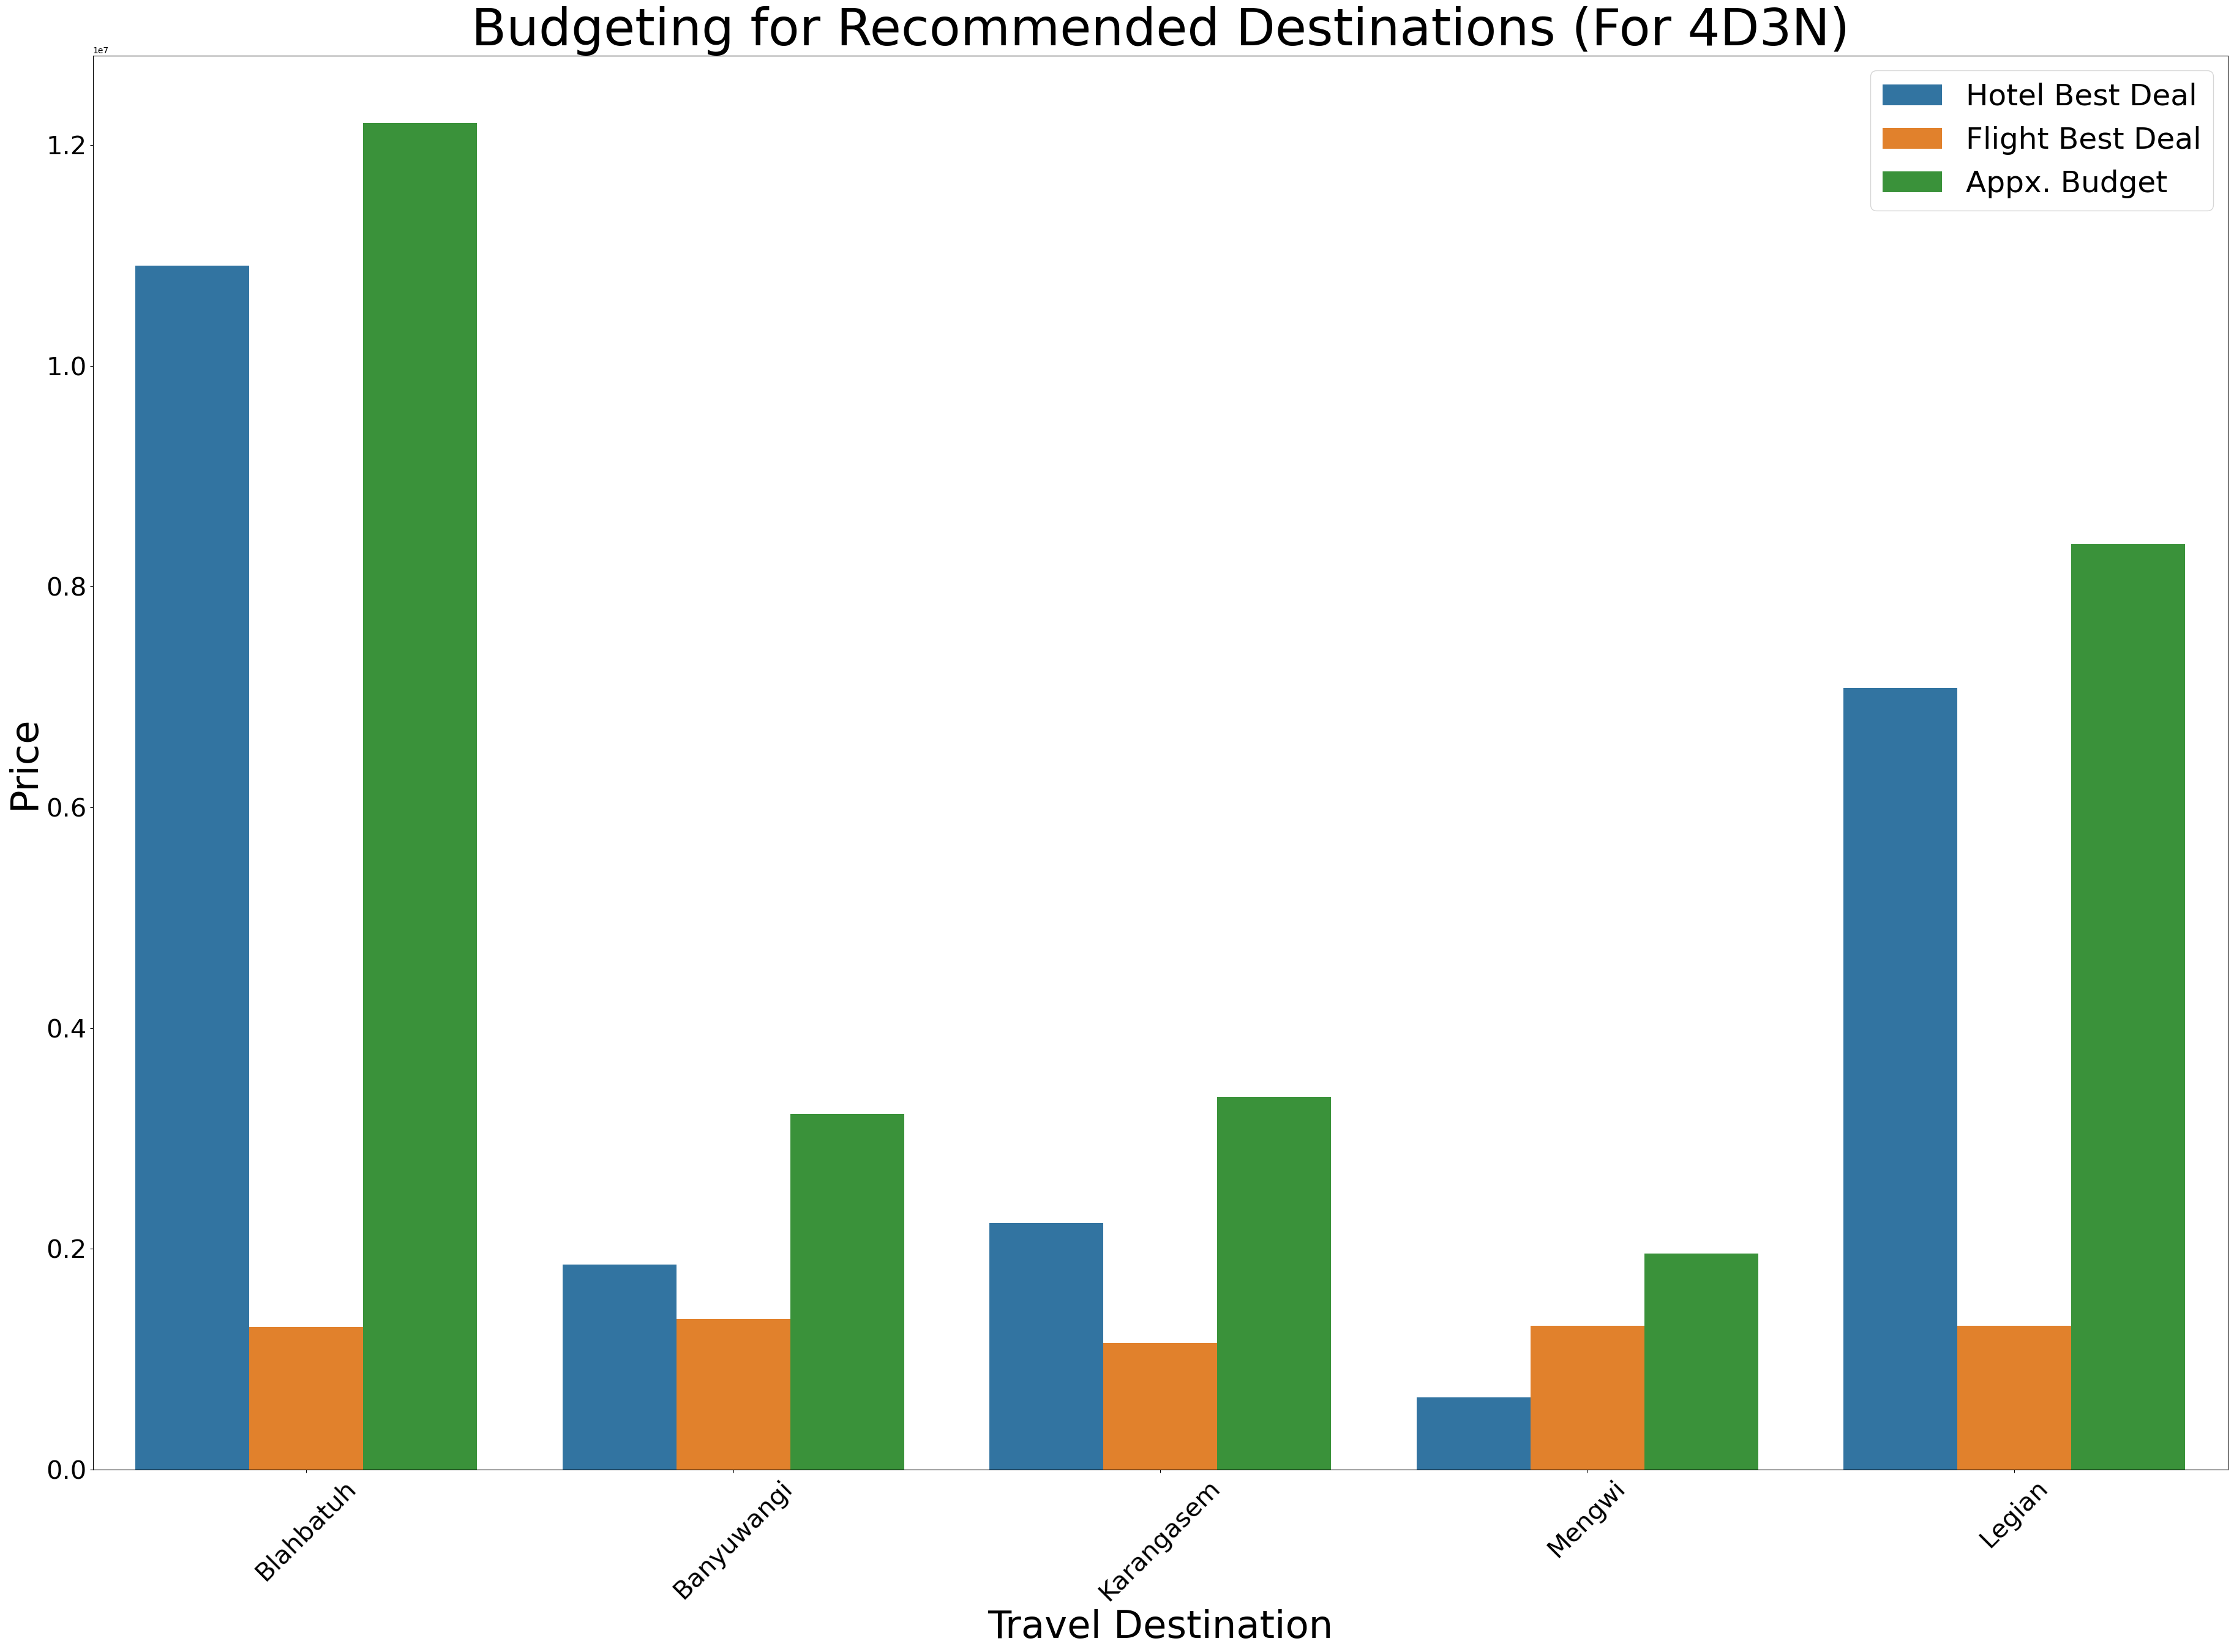

In [169]:
fig=plt.figure(figsize=(45,30))
sns.barplot(x="Destination",y="Price", hue="Price_Type", data=df_viz)
plt.xticks(rotation=45, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Travel Destination',fontsize=45)
plt.ylabel('Price',fontsize=45)
plt.legend(fontsize=35)
plt.title("Budgeting for Recommended Destinations (For 4D3N)", fontsize=60)
# fig.savefig("budget_destination.png")


### Data Analysis and Visualization

In [170]:
df1.head()

,Country Name,Travel Destination,Location,Things to Do,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal,Review Count
0,Indonesia,Bintan,"Bintan Regency, Indonesia",aktivitasluarruangan pemandangandantengara ...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
1,Indonesia,Seminyak,"Kecamatan Kuta, Indonesia",spadankebugaran aktivitasluarruangan tempatbe...,https://www.tripadvisor.co.id/Hotels-g469404-S...,2331874,https://www.tripadvisor.co.id/Flights-g469404-...,1305700,451212
2,Indonesia,Bali,Indonesia,aktivitasluarruangan spadankebugaran tempat...,https://www.tripadvisor.co.id/Hotels-g294226-B...,656190,https://www.tripadvisor.co.id/Flights-g294226-...,1145870,2998882
3,Indonesia,Ubud,"Gianyar Regency, Indonesia",aktivitasluarruangan spadankebugaran tempat...,https://www.tripadvisor.co.id/Hotels-g297701-U...,2865927,https://www.tripadvisor.co.id/Flights-g297701-...,1145870,610495
4,Indonesia,Jakarta,"Jawa, Indonesia",tempatbelanja spadankebugaran aktivitasluarru...,https://www.tripadvisor.co.id/Hotels-g294229-J...,360563,https://www.tripadvisor.co.id/Flights-g294229-...,0,339358


In [171]:
df2.head()

,Spot/Vendor,Travel Destination,Spot / Vendor Name,Type,Link,Review Count
0,Klub Golf Ria Bintan - Bintan,Bintan,Klub Golf Ria Bintan,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,249.0
1,Air Adventures Flying Club Bintan - Bintan,Bintan,Air Adventures Flying Club Bintan,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,64.0
2,Pantai Trikora - Bintan,Bintan,Pantai Trikora,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,125.0
3,Bintan Taxi (民丹岛出租车服务） - Bintan,Bintan,Bintan Taxi (民丹岛出租车服务）,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,32.0
4,Klub Golf Bintan Lagoon Resort - Bintan,Bintan,Klub Golf Bintan Lagoon Resort,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,148.0


In [172]:
df3=df1.merge(df2, on="Travel Destination")

In [173]:
df3.columns

Index(['Country Name', 'Travel Destination', 'Location', 'Things to Do',
       'Hotel Link', 'Hotel Best Deal', 'Flight Link', 'Flight Best Deal',
       'Review Count_x', 'Spot/Vendor', 'Spot / Vendor Name', 'Type', 'Link',
       'Review Count_y'],
      dtype='object')

In [174]:
df3=df3.rename(columns={'Things to Do':"Destination Type",
       'Review Count_x': "Review Count_Destination",
                    'Type':"Spot/Vendor Type", 
                        "Link":"Spot/Vendor Link",
       'Review Count_y':"Review Count_Spot/Vendor"})

In [175]:
df3.to_csv("dataset_summary.csv",index=False)

In [176]:
df3.columns

Index(['Country Name', 'Travel Destination', 'Location', 'Destination Type',
       'Hotel Link', 'Hotel Best Deal', 'Flight Link', 'Flight Best Deal',
       'Review Count_Destination', 'Spot/Vendor', 'Spot / Vendor Name',
       'Spot/Vendor Type', 'Spot/Vendor Link', 'Review Count_Spot/Vendor'],
      dtype='object')

In [177]:
df3=df3[['Spot / Vendor Name',
       'Spot/Vendor Type', 'Spot/Vendor Link', 'Review Count_Spot/Vendor','Travel Destination', 'Location', 'Destination Type',
       'Hotel Link', 'Hotel Best Deal', 'Flight Link', 'Flight Best Deal',
       'Review Count_Destination']]

In [178]:
df3.describe()

,Review Count_Spot/Vendor,Hotel Best Deal,Flight Best Deal,Review Count_Destination
count,12333.000000,1.241500e+04,1.241500e+04,1.241500e+04
mean,150.202141,1.044581e+06,1.413173e+06,2.261185e+05
std,777.702802,1.449286e+06,1.066188e+06,5.294988e+05
min,0.000000,1.063130e+05,0.000000e+00,1.040000e+02
25%,3.000000,3.673100e+05,1.096600e+06,9.150000e+03
50%,17.000000,6.561900e+05,1.201700e+06,5.622200e+04
75%,86.000000,1.238194e+06,1.358600e+06,1.891700e+05
max,34864.000000,1.593223e+07,9.152495e+06,2.998882e+06


In [179]:
df3.head()

,Spot / Vendor Name,Spot/Vendor Type,Spot/Vendor Link,Review Count_Spot/Vendor,Travel Destination,Location,Destination Type,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal,Review Count_Destination
0,Klub Golf Ria Bintan,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,249.0,Bintan,"Bintan Regency, Indonesia",aktivitasluarruangan pemandangandantengara ...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
1,Air Adventures Flying Club Bintan,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,64.0,Bintan,"Bintan Regency, Indonesia",aktivitasluarruangan pemandangandantengara ...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
2,Pantai Trikora,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,125.0,Bintan,"Bintan Regency, Indonesia",aktivitasluarruangan pemandangandantengara ...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
3,Bintan Taxi (民丹岛出租车服务）,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,32.0,Bintan,"Bintan Regency, Indonesia",aktivitasluarruangan pemandangandantengara ...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
4,Klub Golf Bintan Lagoon Resort,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,148.0,Bintan,"Bintan Regency, Indonesia",aktivitasluarruangan pemandangandantengara ...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006


In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
IQR=df1["Review Count"].describe()["75%"]-df1["Review Count"].describe()["25%"]
maxim=df1["Review Count"].describe()["75%"]+IQR
minim=df1["Review Count"].describe()["25%"]-IQR

In [182]:
df_pop=df1[df1["Review Count"]>maxim]

In [183]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 310
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country Name        60 non-null     object
 1   Travel Destination  60 non-null     object
 2   Location            60 non-null     object
 3   Things to Do        60 non-null     object
 4   Hotel Link          60 non-null     object
 5   Hotel Best Deal     60 non-null     int64 
 6   Flight Link         60 non-null     object
 7   Flight Best Deal    60 non-null     int64 
 8   Review Count        60 non-null     int64 
dtypes: int64(3), object(6)
memory usage: 4.7+ KB


In [184]:
df_pop.sort_values(by="Review Count")

,Country Name,Travel Destination,Location,Things to Do,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal,Review Count
310,Indonesia,Bangli,"Bali, Indonesia",aktivitasluarruangan pemandangandantengara w...,https://www.tripadvisor.co.id/Hotels-g1025506-...,400000,https://www.tripadvisor.co.id/Flights-g1025506...,1145870,18026
62,Indonesia,Manado,"Sulawesi Utara, Indonesia",aktivitasluarruangan wisataalamdantaman pema...,https://www.tripadvisor.co.id/Hotels-g297721-M...,485100,https://www.tripadvisor.co.id/Flights-g297721-...,2161400,18926
21,Indonesia,Uluwatu,"Bali, Indonesia",aktivitasluarruangan spadankebugaran kursus...,https://www.tripadvisor.co.id/Hotels-g8366411-...,8153000,https://www.tripadvisor.co.id/Flights-g8366411...,1305700,19396
37,Indonesia,Ungasan,"Semenanjung Nusa Dua, Indonesia",aktivitasluarruangan spadankebugaran wisataal...,https://www.tripadvisor.co.id/Hotels-g1219108-...,1749174,https://www.tripadvisor.co.id/Flights-g1219108...,1305700,20054
53,Indonesia,Tuban,"Kuta, Indonesia",aktivitasluarruangan spadankebugaran tempat...,https://www.tripadvisor.co.id/Hotels-g562690-T...,788500,https://www.tripadvisor.co.id/Flights-g562690-...,1305700,20552
55,Indonesia,Tabanan,"Bali, Indonesia",aktivitasluarruangan wisataalamdantaman peman...,https://www.tripadvisor.co.id/Hotels-g608496-T...,818182,https://www.tripadvisor.co.id/Flights-g608496-...,1305700,21625
54,Indonesia,Pemuteran,"Gerokgak, Indonesia",aktivitasluarruangan spadankebugaran wisata...,https://www.tripadvisor.co.id/Hotels-g608493-P...,130165,https://www.tripadvisor.co.id/Flights-g608493-...,1145870,22705
30,Indonesia,Nusa Penida,"Bali, Indonesia",aktivitasluarruangan wisataalamdantaman pem...,https://www.tripadvisor.co.id/Hotels-g2538506-...,500776,https://www.tripadvisor.co.id/Flights-g2538506...,1145870,24938
33,Indonesia,Pantai Lovina,"Buleleng, Indonesia",aktivitasluarruangan spadankebugaran kursus...,https://www.tripadvisor.co.id/Hotels-g1599559-...,1655215,https://www.tripadvisor.co.id/Flights-g1599559...,1145870,24948
0,Indonesia,Bintan,"Bintan Regency, Indonesia",aktivitasluarruangan pemandangandantengara ...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006


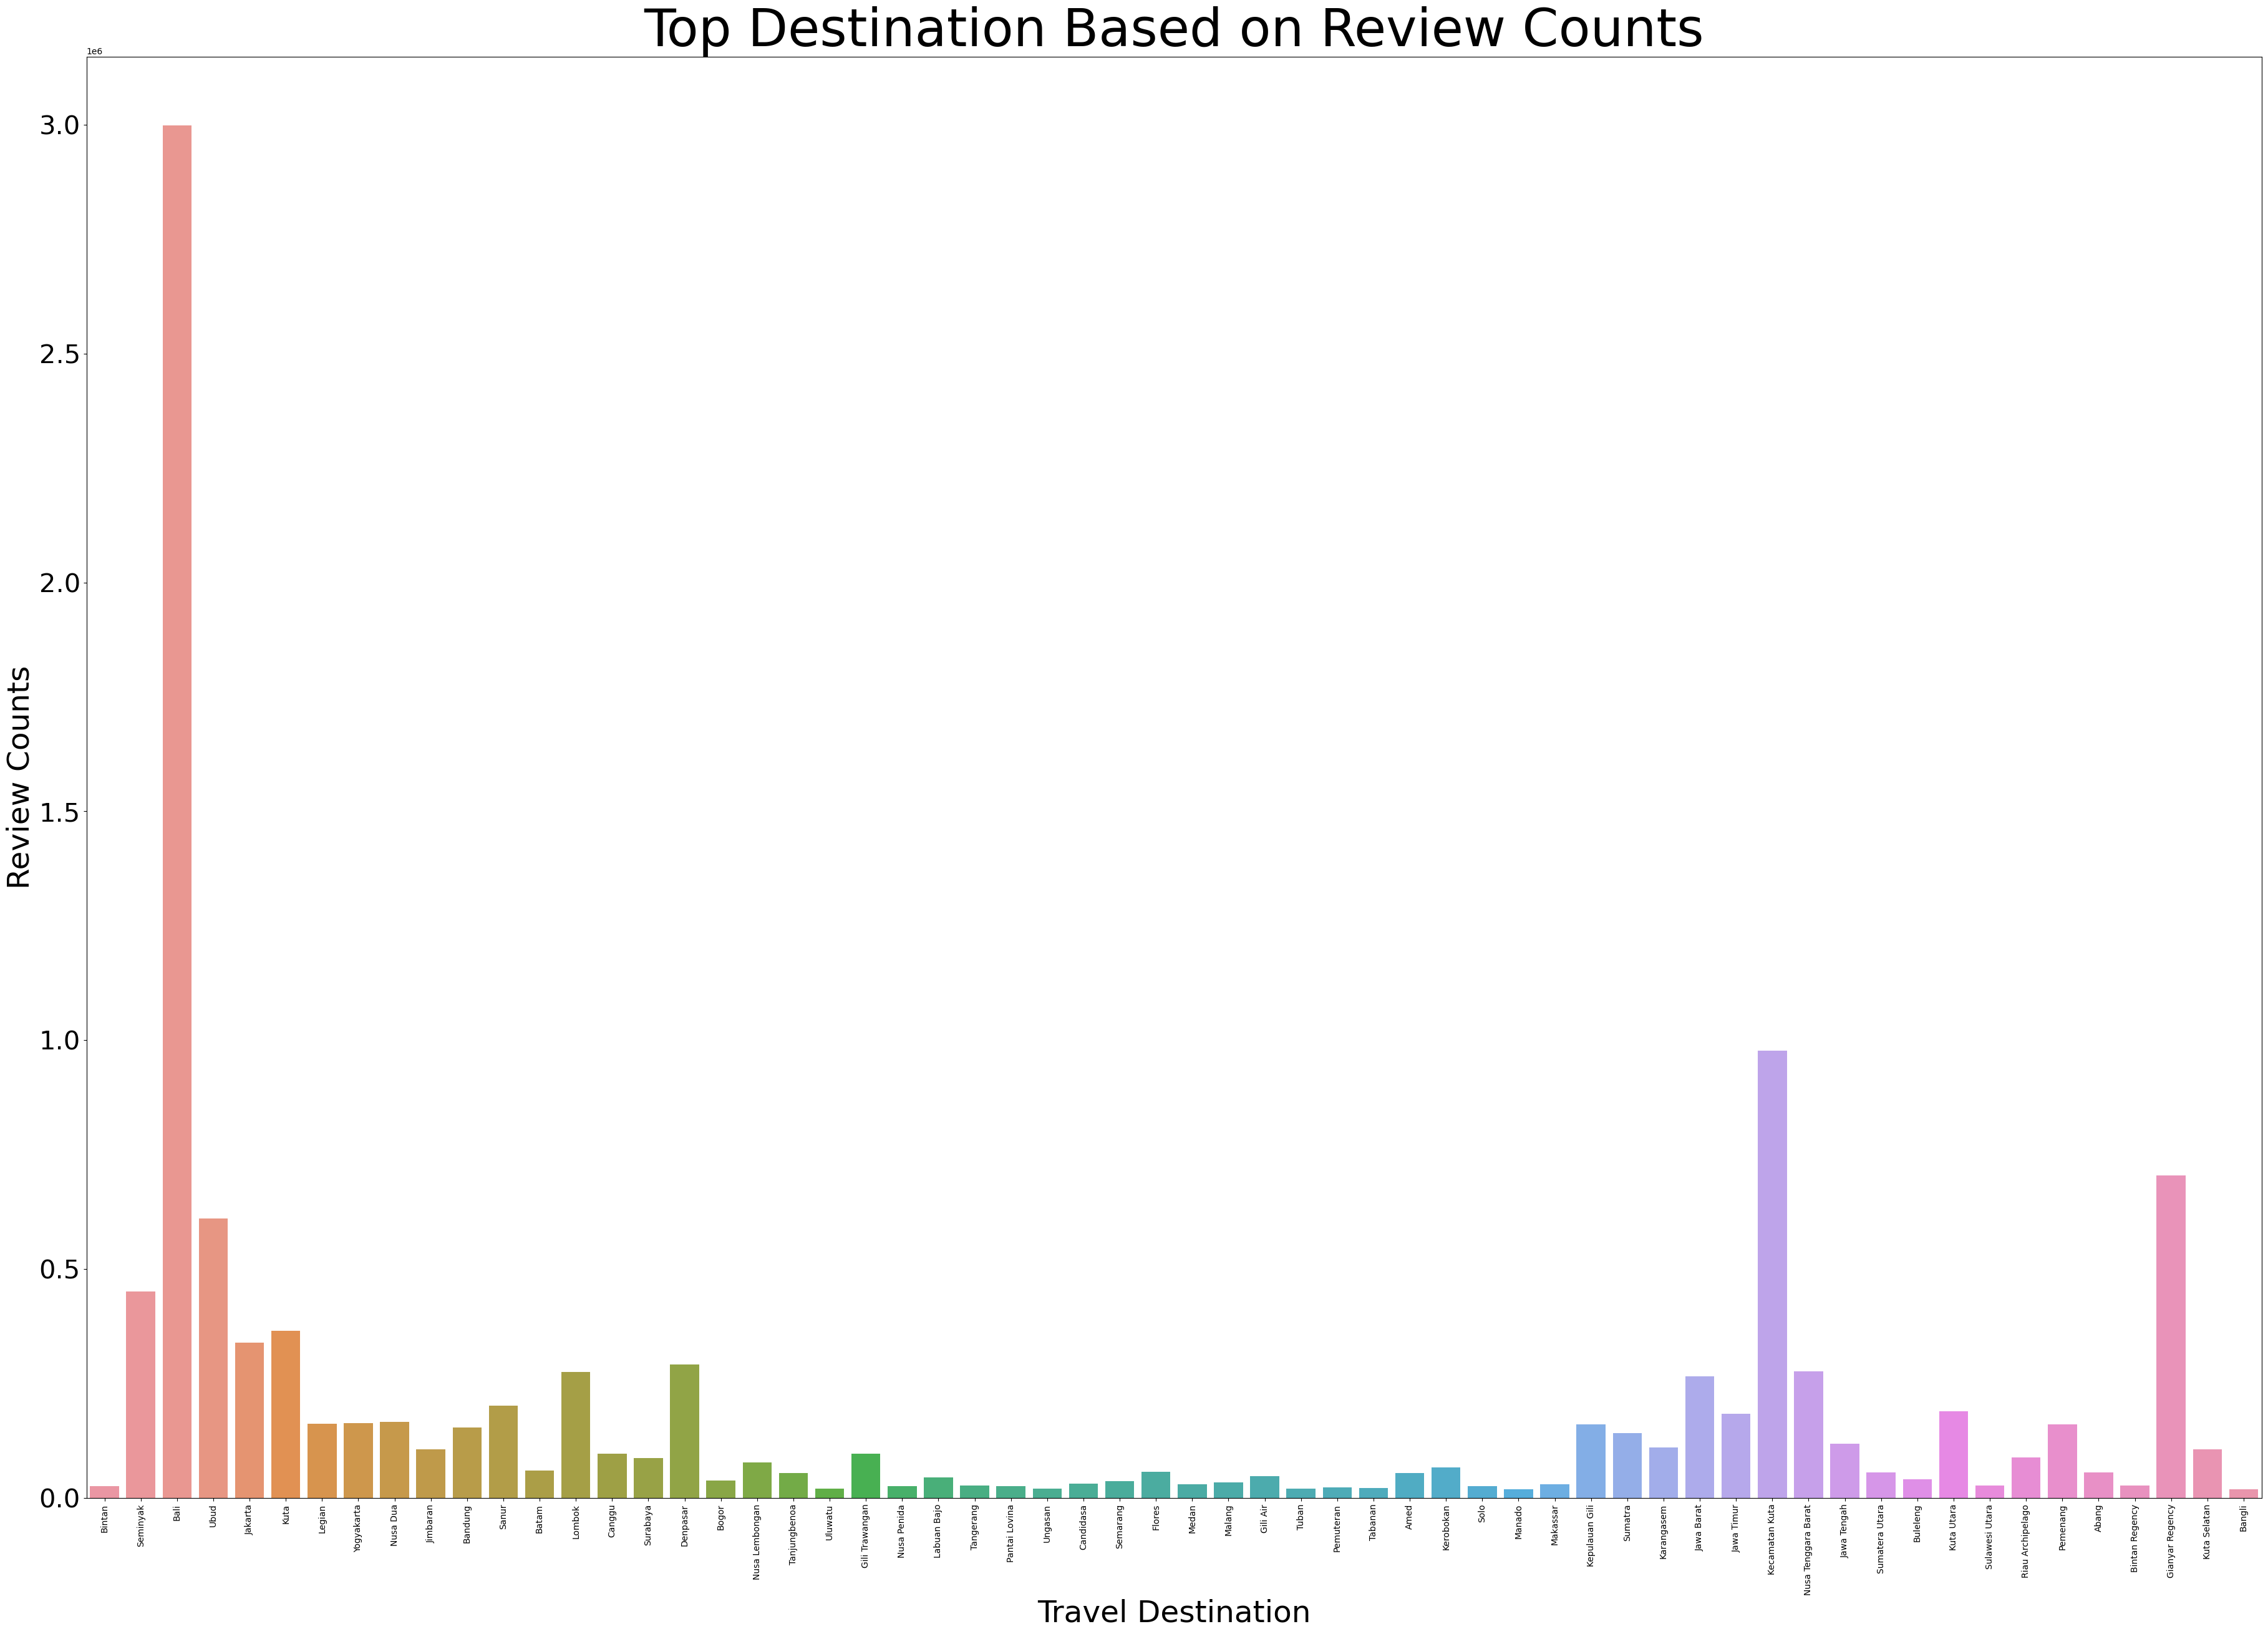

In [185]:
import matplotlib
fig=plt.figure(figsize=(45,30))
sns.barplot(x="Travel Destination", y="Review Count", data=df_pop)
plt.xticks(rotation=90)
plt.yticks(fontsize=30)
matplotlib.rc("xtick",labelsize=45)
matplotlib.rc("ytick",labelsize=45)
plt.xlabel('Travel Destination',fontsize=35)
plt.ylabel('Review Counts',fontsize=35)
plt.title("Top Destination Based on Review Counts", fontsize=60)
fig.savefig("topdestination.png")

In [186]:
df1

,Country Name,Travel Destination,Location,Things to Do,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal,Review Count
0,Indonesia,Bintan,"Bintan Regency, Indonesia",aktivitasluarruangan pemandangandantengara ...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
1,Indonesia,Seminyak,"Kecamatan Kuta, Indonesia",spadankebugaran aktivitasluarruangan tempatbe...,https://www.tripadvisor.co.id/Hotels-g469404-S...,2331874,https://www.tripadvisor.co.id/Flights-g469404-...,1305700,451212
2,Indonesia,Bali,Indonesia,aktivitasluarruangan spadankebugaran tempat...,https://www.tripadvisor.co.id/Hotels-g294226-B...,656190,https://www.tripadvisor.co.id/Flights-g294226-...,1145870,2998882
3,Indonesia,Ubud,"Gianyar Regency, Indonesia",aktivitasluarruangan spadankebugaran tempat...,https://www.tripadvisor.co.id/Hotels-g297701-U...,2865927,https://www.tripadvisor.co.id/Flights-g297701-...,1145870,610495
4,Indonesia,Jakarta,"Jawa, Indonesia",tempatbelanja spadankebugaran aktivitasluarru...,https://www.tripadvisor.co.id/Hotels-g294229-J...,360563,https://www.tripadvisor.co.id/Flights-g294229-...,0,339358
...,...,...,...,...,...,...,...,...,...
315,Indonesia,Toyapakeh,"Nusa Penida, Indonesia",aktivitasluarruangan cocokuntukpasangan harg...,https://www.tripadvisor.co.id/Hotels-g14115586...,663636,https://www.tripadvisor.co.id/Flights-g1411558...,1752927,742
316,Indonesia,Singakerta,"Ubud, Indonesia",spadankebugaran kursusdansanggar hiburandanpe...,https://www.tripadvisor.co.id/Hotels-g15880600...,661107,https://www.tripadvisor.co.id/Flights-g1588060...,1752927,2019
317,Indonesia,Guwang,"Sukawati, Indonesia",wisataalamdantaman cocokuntukpasangan hargater...,https://www.tripadvisor.com/Hotels-g19140131-G...,235636,https://www.tripadvisor.com/CheapFlightsSearch...,1724800,343
318,Indonesia,Singapadu Kaler,"Sukawati, Indonesia",aktivitasluarruangan,https://www.tripadvisor.co.id/Hotels-g20116867...,627097,https://www.tripadvisor.co.id/Flights-g2011686...,1197735,309


In [187]:
df_top10=df_pop.sort_values(by="Review Count", ascending=False).head(10).reset_index()

In [188]:
dftop_hotelprice=df_top10[["Travel Destination","Hotel Best Deal"]]
dftop_hotelprice["Price_Type"]="Hotel Best Deal"
dftop_hotelprice=dftop_hotelprice.rename(columns={"Hotel Best Deal":"Price"})

dftop_flightprice=df_top10[["Travel Destination","Flight Best Deal"]]
dftop_flightprice["Price_Type"]="Flight Best Deal"
dftop_flightprice=dftop_flightprice.rename(columns={"Flight Best Deal":"Price"})

df_top10["Appx. Total Price"]=df_top10["Hotel Best Deal"]+df1["Flight Best Deal"]
dftop_total=df_top10[["Travel Destination","Appx. Total Price"]]
dftop_total["Price_Type"]="Appx. Total Price"
dftop_total=dftop_total.rename(columns={"Appx. Total Price":"Price"})

C:\Users\91965\AppData\Local\Temp\ipykernel_684\3447125697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftop_hotelprice["Price_Type"]="Hotel Best Deal"
C:\Users\91965\AppData\Local\Temp\ipykernel_684\3447125697.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftop_flightprice["Price_Type"]="Flight Best Deal"
C:\Users\91965\AppData\Local\Temp\ipykernel_684\3447125697.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [189]:
dftop_viz=pd.concat([dftop_hotelprice,dftop_flightprice,dftop_total])

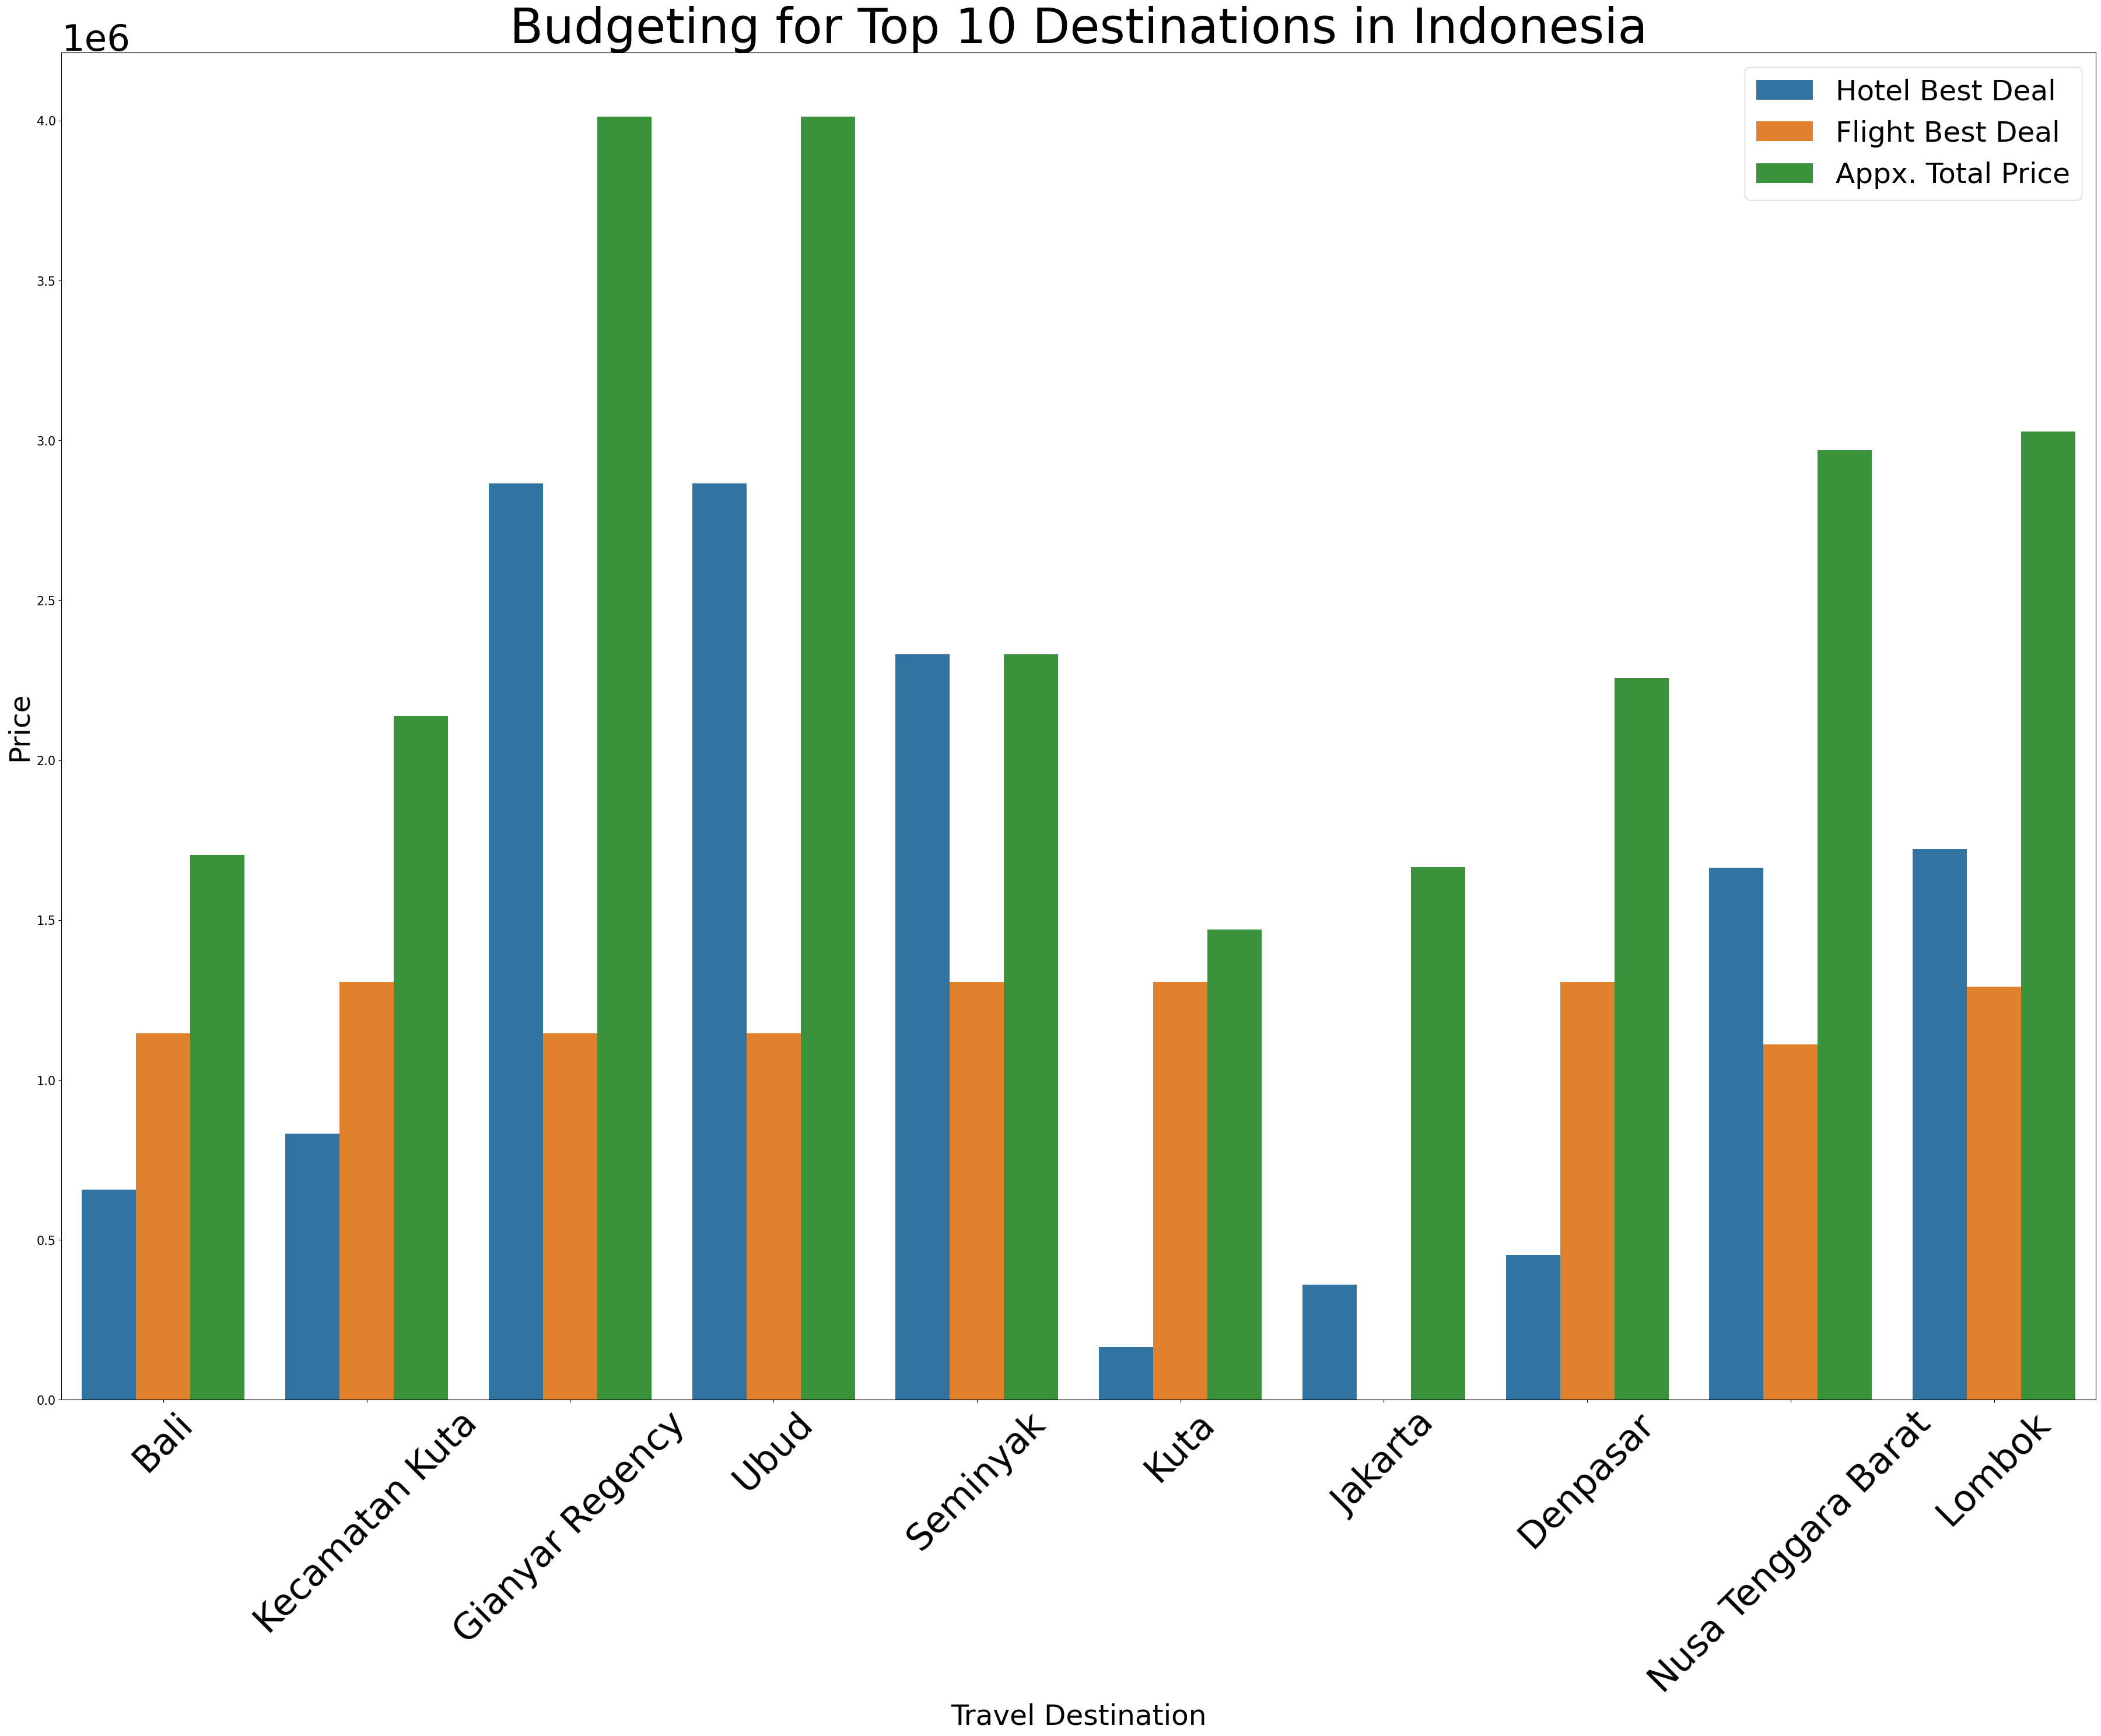

In [190]:
import matplotlib
fig=plt.figure(figsize=(45,30))
# plt.font
sns.barplot(x="Travel Destination",y="Price", hue="Price_Type", data=dftop_viz)
plt.xticks(rotation=45)
plt.yticks(fontsize=15)
matplotlib.rc("xtick",labelsize=35)
matplotlib.rc("ytick",labelsize=35)
plt.xlabel('Travel Destination',fontsize=35)
plt.ylabel('Price',fontsize=35)
plt.legend(fontsize=35)
plt.title("Budgeting for Top 10 Destinations in Indonesia", fontsize=60)
fig.savefig("budget.png")


C:\Users\91965\AppData\Local\Temp\ipykernel_684\1332902770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1["Review Count"])


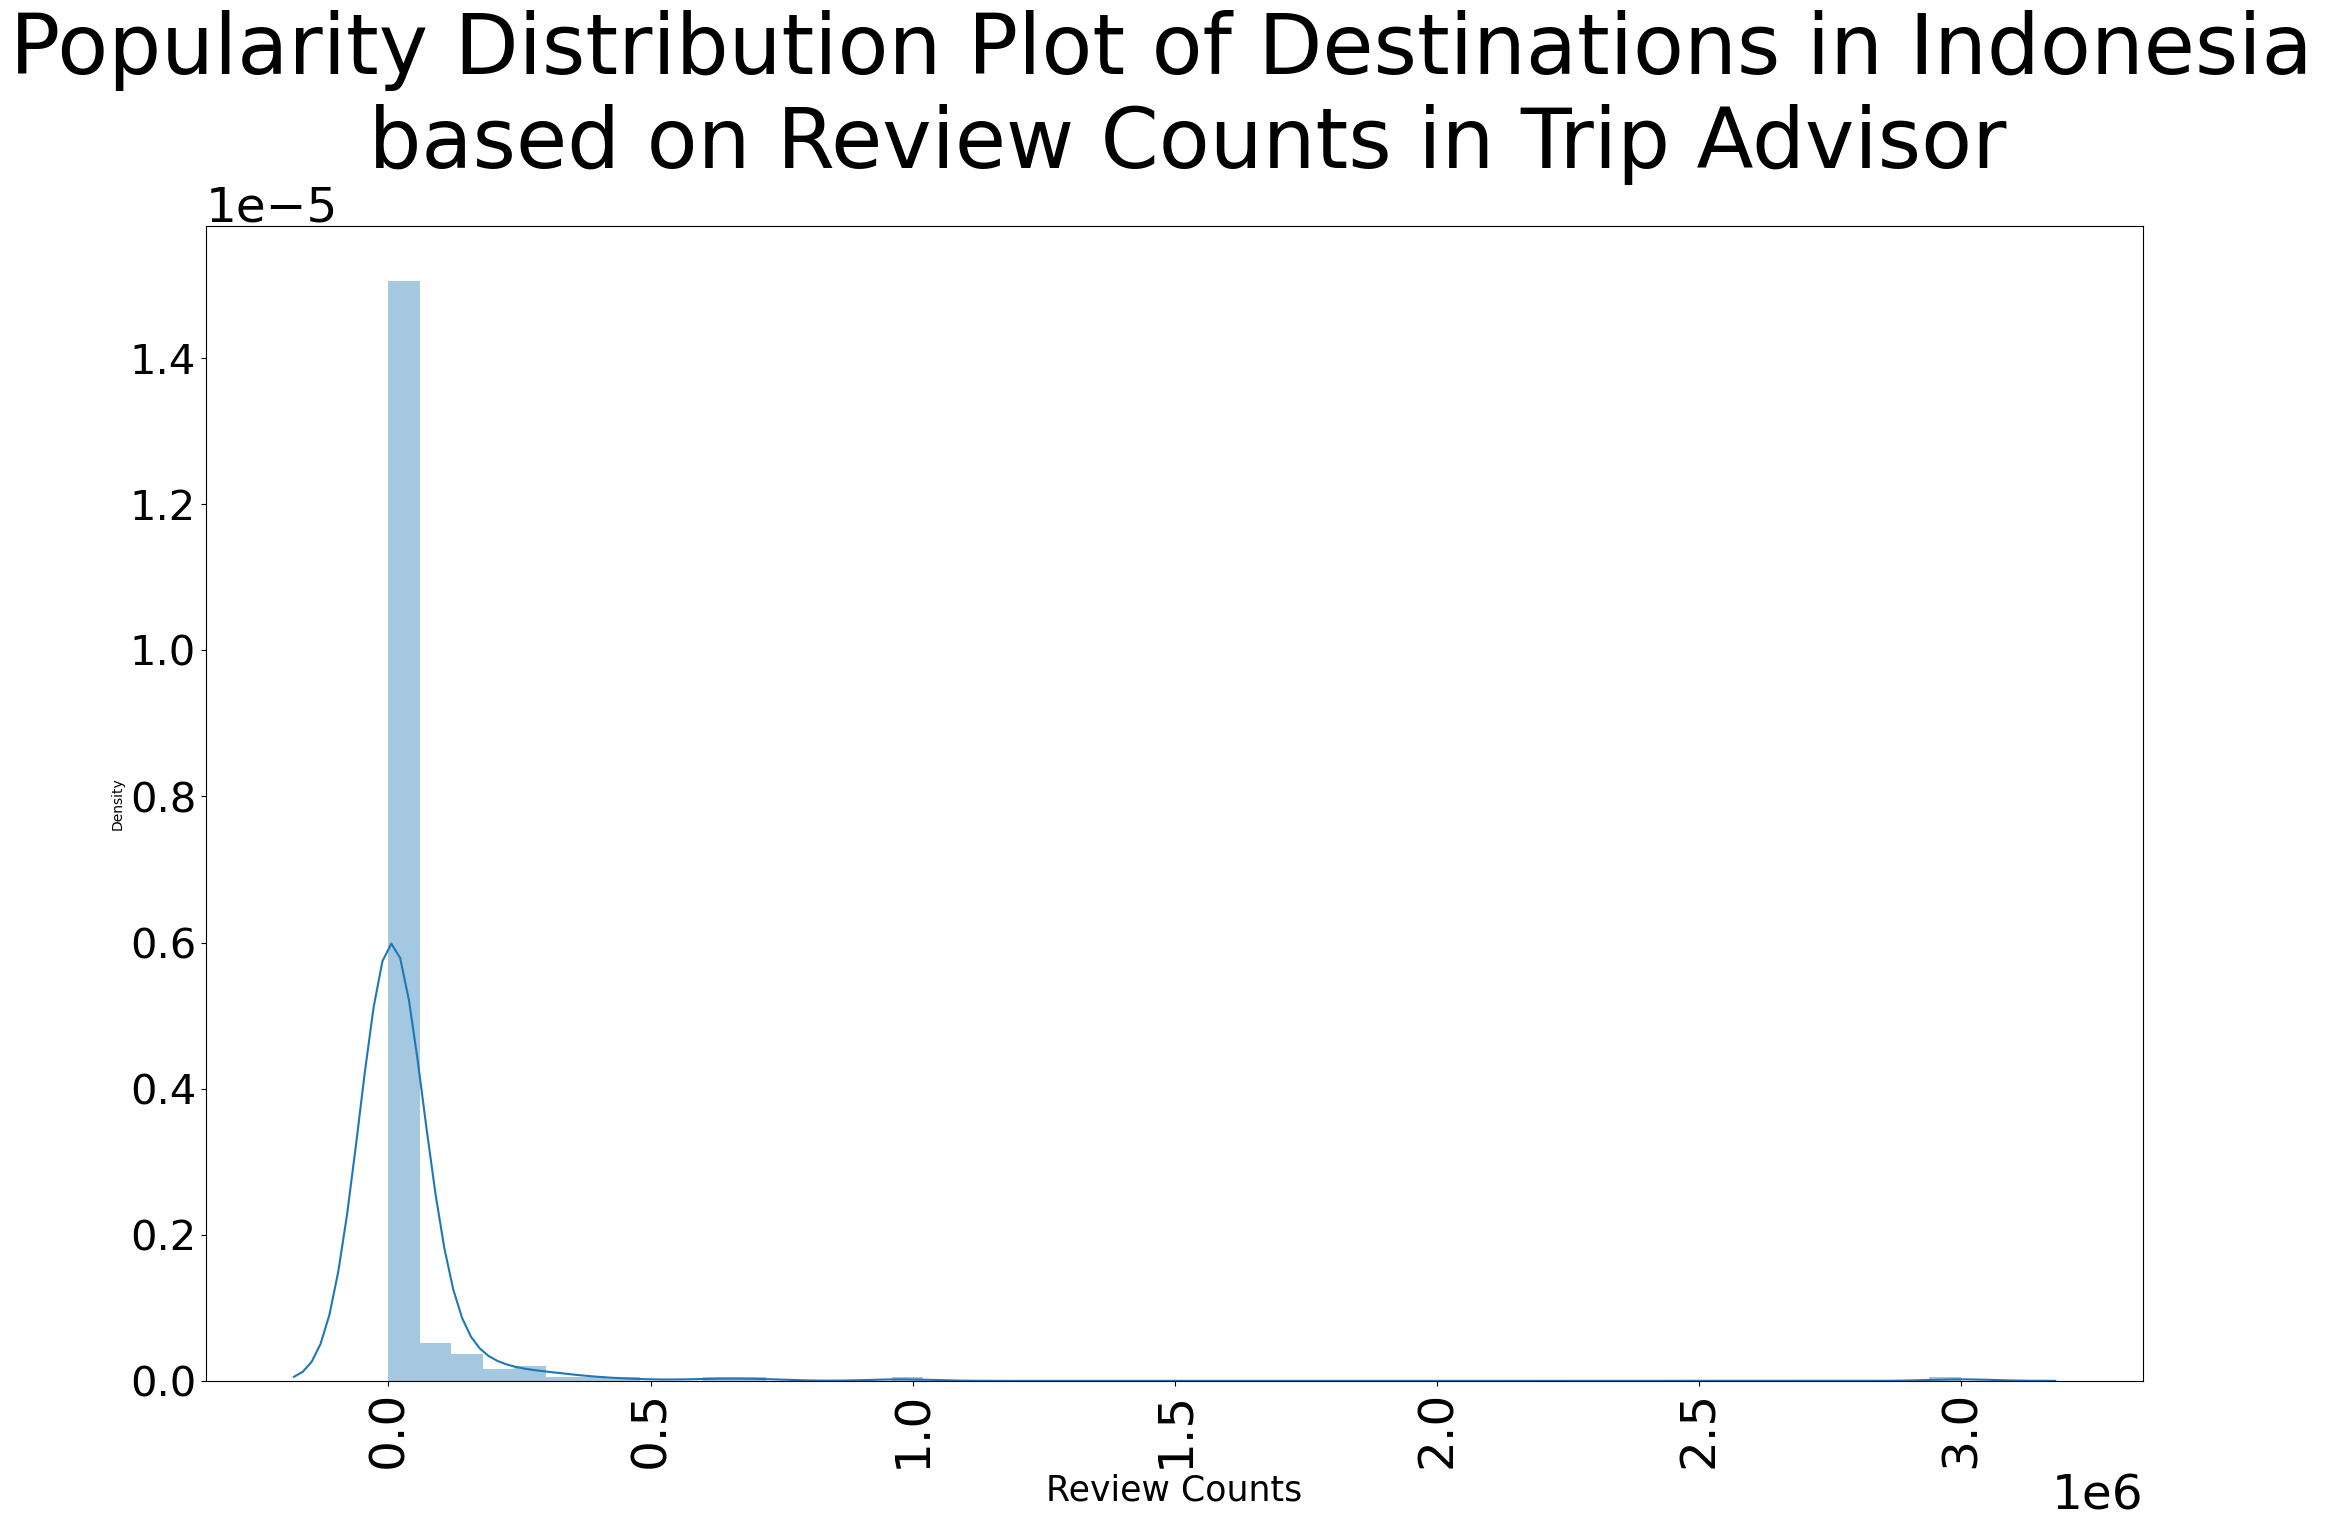

In [191]:
fig=plt.figure(figsize=(25,15))
sns.distplot(df1["Review Count"])
plt.xticks(rotation=90)
plt.yticks(fontsize=30)
matplotlib.rc("xtick",labelsize=20)
matplotlib.rc("ytick",labelsize=20)
plt.xlabel('Review Counts',fontsize=25)
plt.title("Popularity Distribution Plot of Destinations in Indonesia \n based on Review Counts in Trip Advisor", fontsize=60)
fig.savefig("popdist.png")